# Cinnecta

O presente arquivo do Jupyter Notebook consiste ena primeira etapa do processo seletivo para a vaga de cientista de dados da empresa Cinnecta. O objetivo é avaliar a capacidade de extração de conhecimento básico a partir de uma base de
dados. 

O arquivo disponibilizado é  *“Online Retail.xlsx”* em formato Excel, que representa vendas de uma loja online. 

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi']=300
plt.rcParams["figure.figsize"] = (12, 8)

In [3]:
df = pd.read_excel('Online Retail (P-01).xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
#Dimensões do dataframe
df.shape

(541909, 8)

**Quantas linhas possui o conjunto de dados?**

In [5]:
df.shape[0]

541909

**Quais são os nomes e os tipos de cada atributo do conjunto de dados?**

In [274]:
#visão geral
geral = pd.DataFrame({'Colunas': df.columns,
                      'Tipo': df.dtypes,
                      'Total valores faltantes' : df.isna().sum(),
                      'Percentual de valores faltantes' : (df.isna().sum()/df.shape[0])*100,
                      'Valores únicos': df.nunique()}).reset_index().drop('index', axis=1)
geral

,Colunas,Tipo,Total valores faltantes,Percentual de valores faltantes,Valores únicos
0,InvoiceNo,object,0,0.000000,25900
1,StockCode,object,0,0.000000,4070
2,Description,object,1454,0.268311,4223
3,Quantity,int64,0,0.000000,722
4,InvoiceDate,datetime64[ns],0,0.000000,23260
5,UnitPrice,float64,0,0.000000,1630
6,CustomerID,float64,135080,24.926694,4372
7,Country,object,0,0.000000,38


In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [276]:
#Ajuste da variável CustomerID converter de float64 para object
df['CustomerID'] = df['CustomerID'].astype('object')

**Quantos produtos distintos existem?**

In [277]:
df['StockCode'].nunique()

4070

**Quantas linhas possuem a descrição com produto ausente ou nula? Após verificar, remova essas
linhas do conjunto de dados.**

In [278]:
df['Description'].isna().sum()

1454

In [13]:
#Primeira alteração no dataset
df1 = df[~df['Description'].isna()].reset_index(drop=True).copy()

In [14]:
df1.shape

(540455, 8)

### Análise das variáveis numéricas

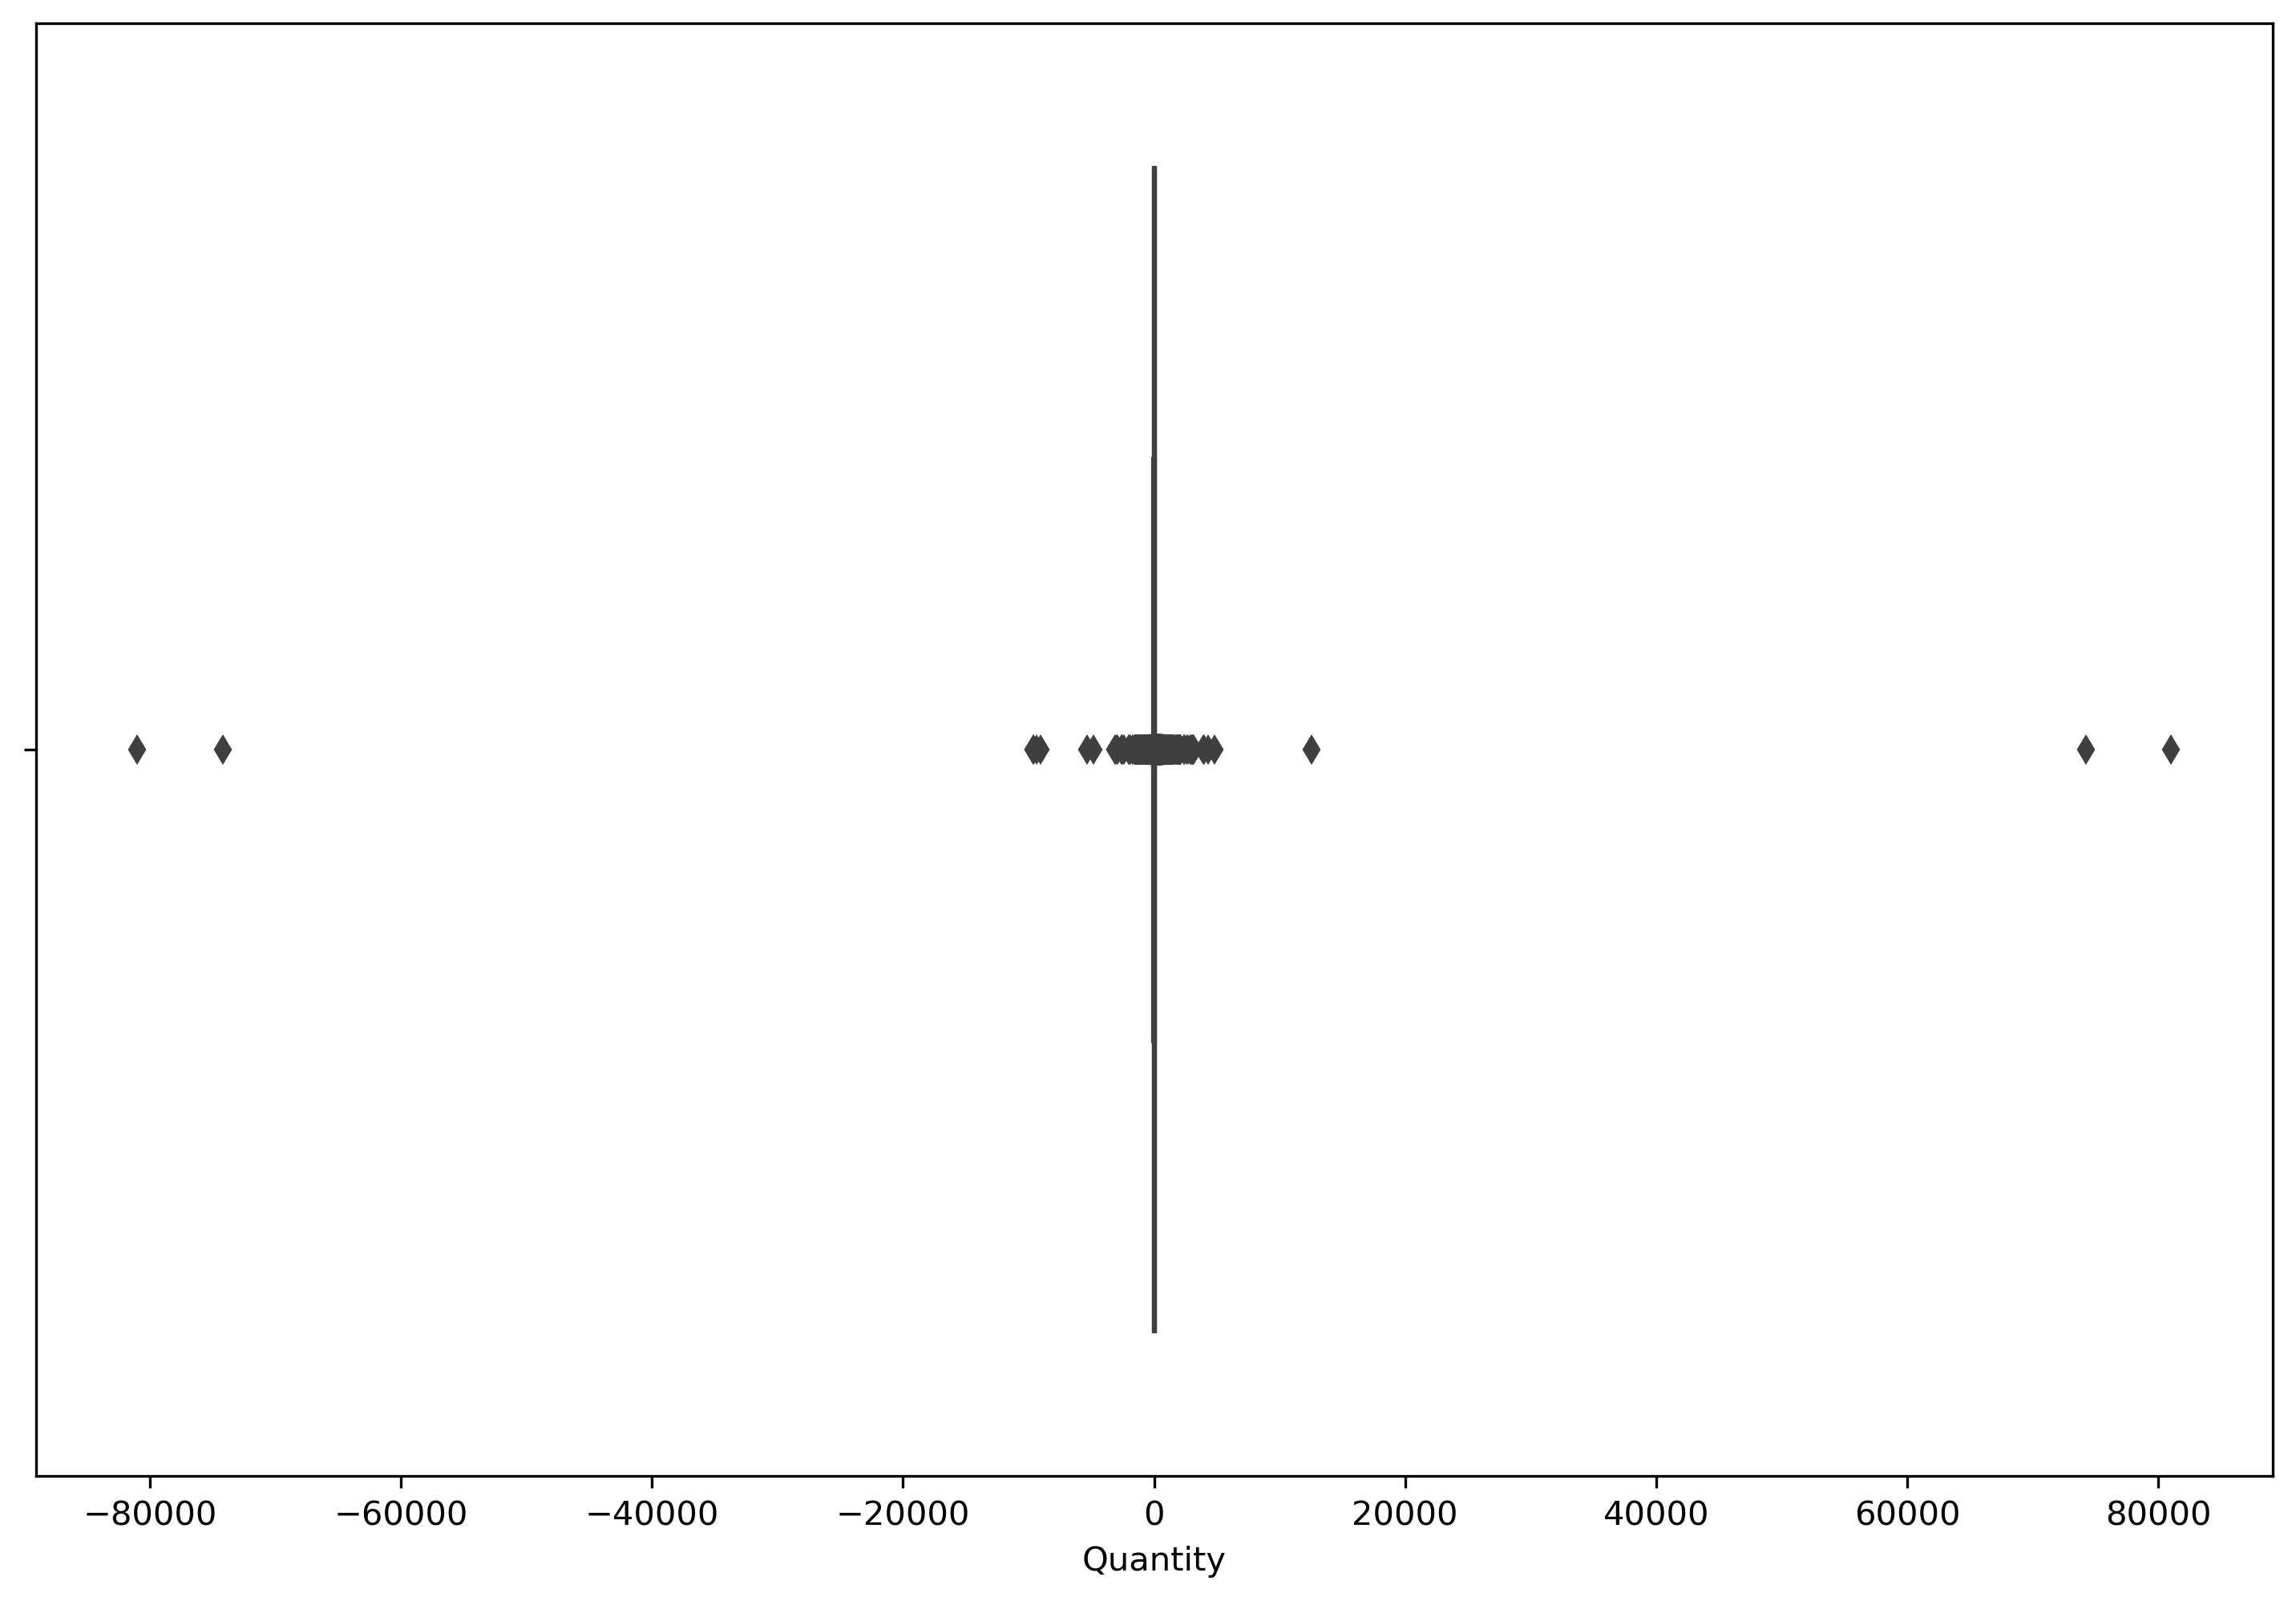

In [16]:
# Variável Quantity
ax = sns.boxplot(x=df1['Quantity'])

É possível verificar a presença de outliers nas quantidades vendidas, mas o que chama mais atenção é a presença de quantidades negativas! Faz sentido para o negócio quantidades negativas? Qual é a quantidade de dados com essa característica?

In [27]:
print(f'A Quantidade de registros que possui quantidades negativas é {df1[df1.Quantity<0].shape[0]}')
print(f'O Percentual dos registros que possui quantidades negativas é {np.round((df1[df1.Quantity<0].shape[0]/df1.shape[0])*100, 2)}%')

A Quantidade de registros que possui quantidades negativas é 9762
O Percentual dos registros que possui quantidades negativas é 1.81%


Por ser um percentual muito baixo e não possuir documentação que justifique o uso de quantidades negativas, optei por remover esses registros

In [28]:
#Exclusão dos registros com quantidades negativas
df1 = df1[~df1['Quantity']<0].reset_index(drop=True).copy()
df1.shape

(530693, 8)

**Quantos objetos do conjunto de dados possuem o valor do atributo UnitPrice menor que zero?
Apague esses objetos do conjunto de dados.**

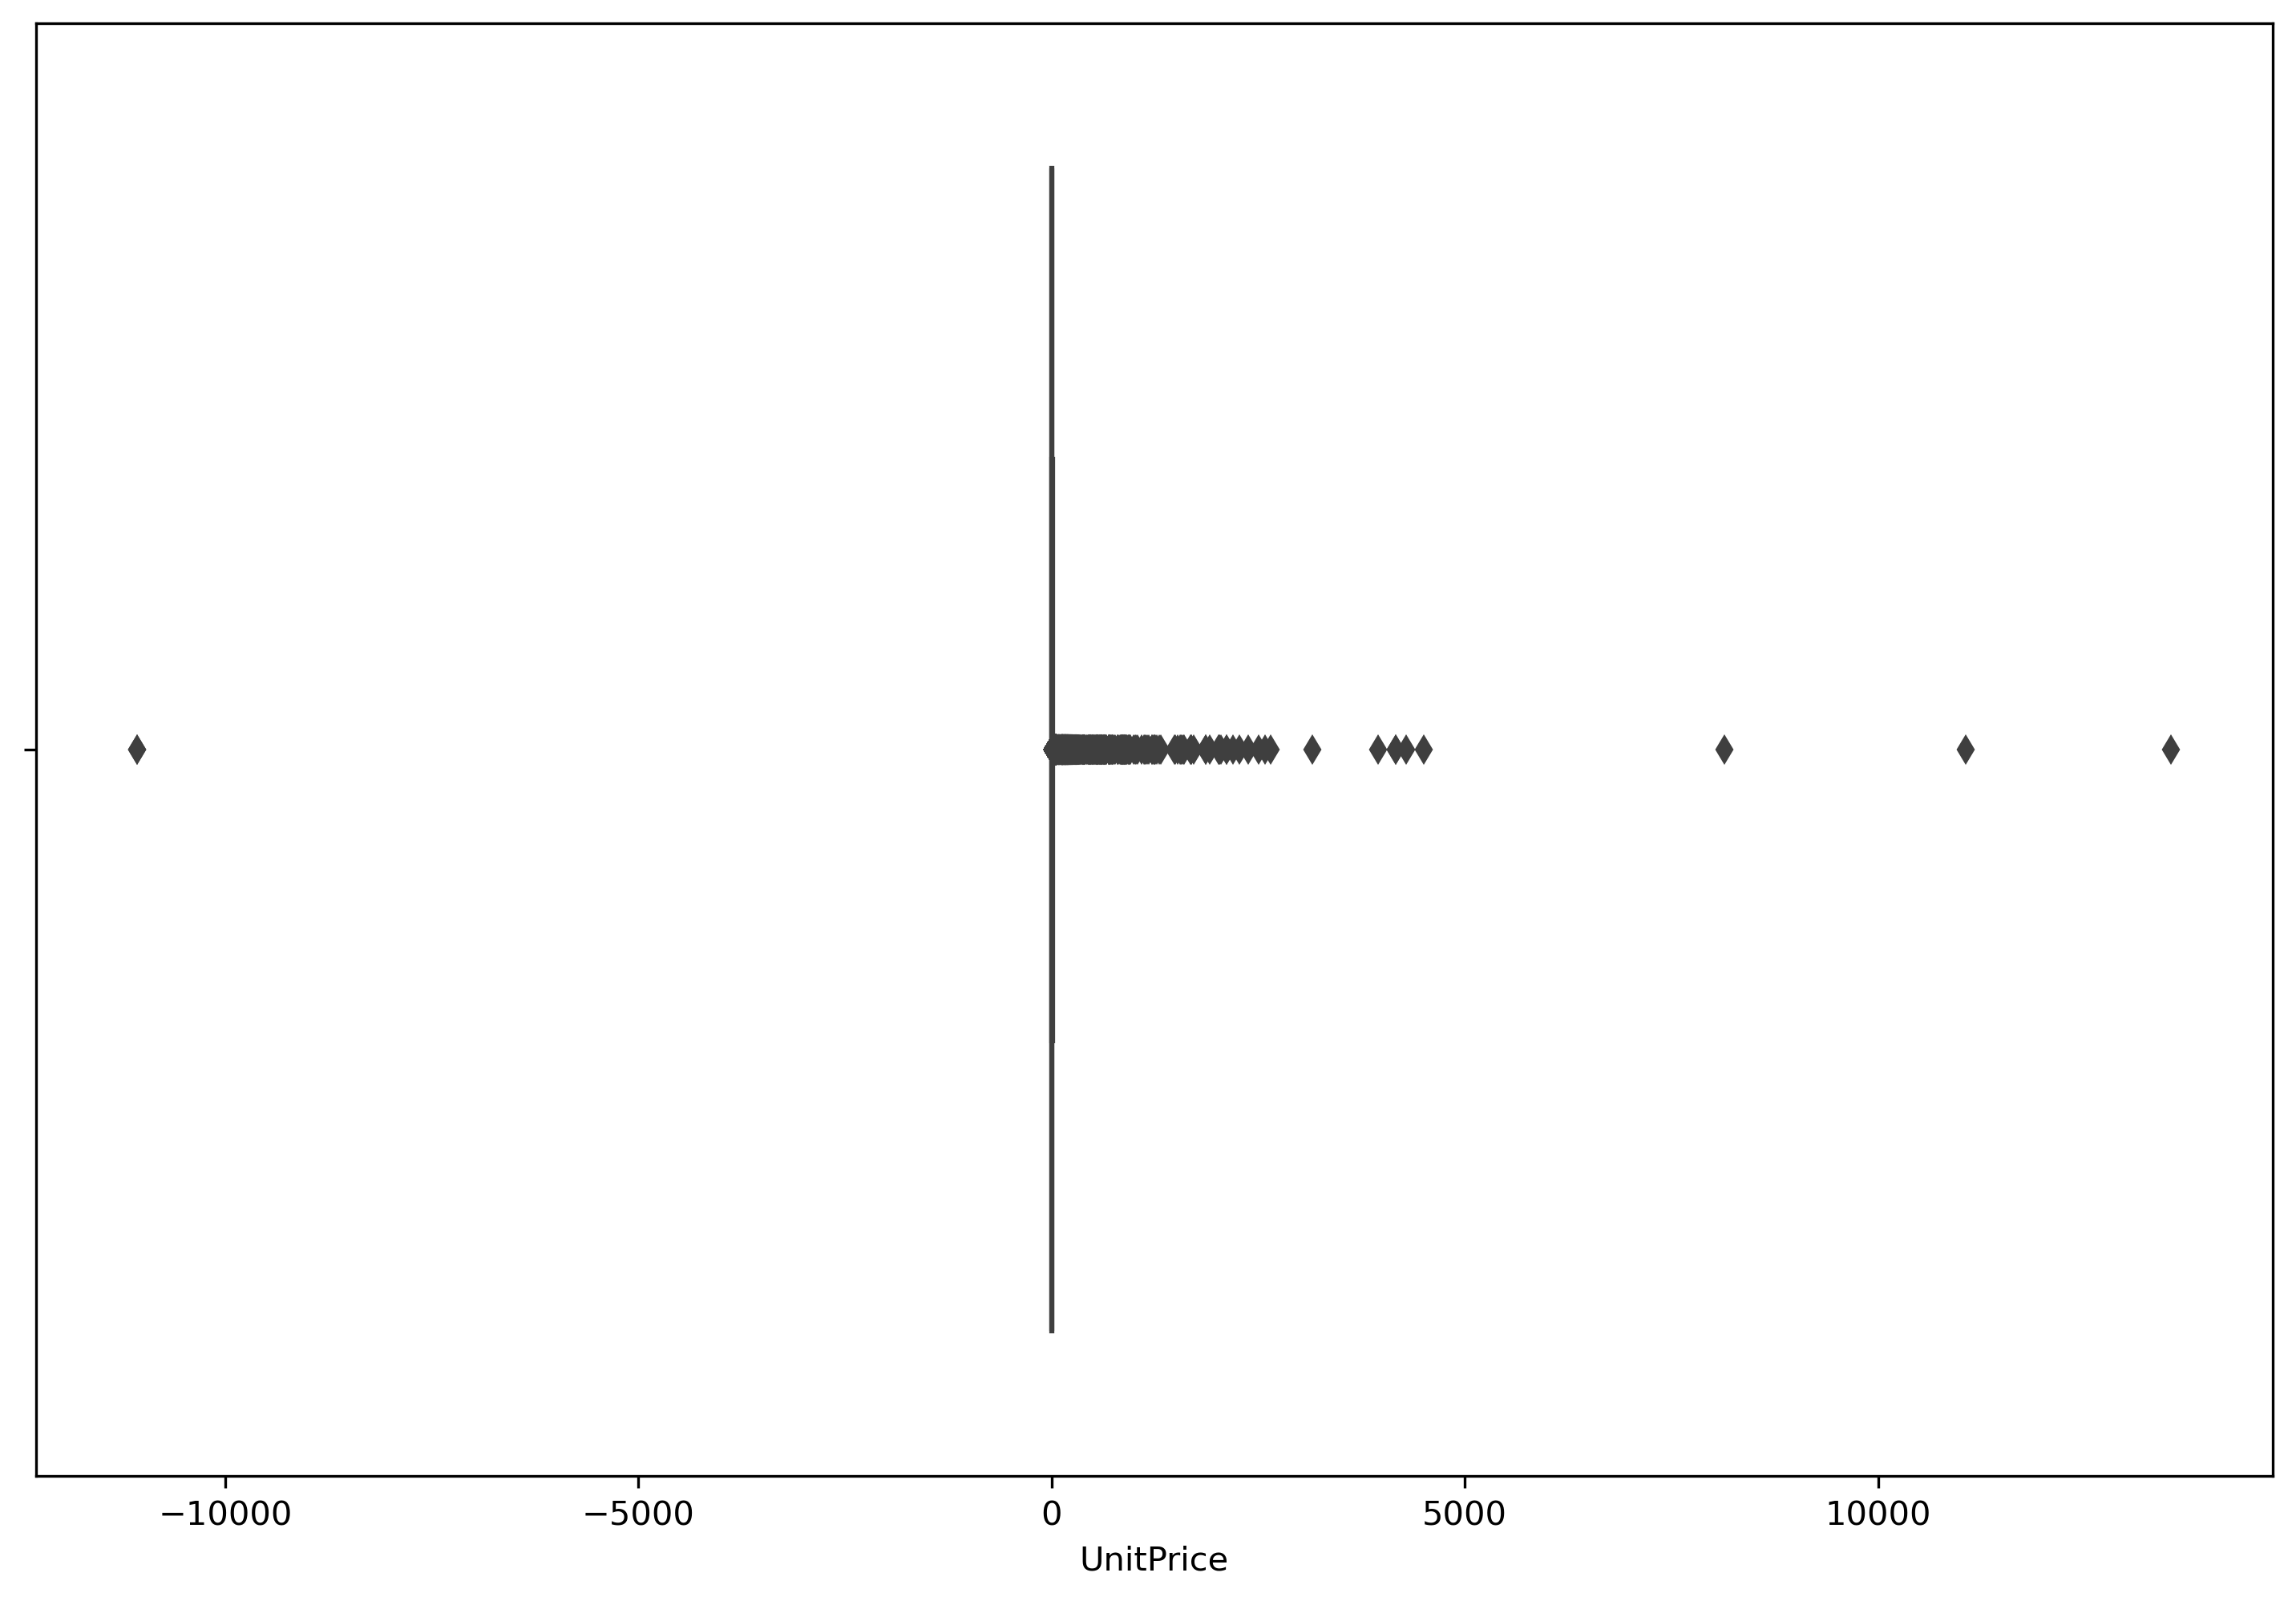

In [284]:
#Variável UnitPrice
ax = sns.boxplot(df1['UnitPrice'])

In [36]:
df1[df1['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
293222,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
293223,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [286]:
print('A Quantidade de registros que possui preço unitario negativo é', df1[df1['UnitPrice']<0].shape[0])
print('O Percentual dos registros que possui preço unitario negativo é', np.round((df1[df1['UnitPrice']<0].shape[0]/df1.shape[0])*100,5))

A Quantidade de registros que possui preço unitario negativo é 2
O Percentual dos registros que possui preço unitario negativo é 0.00038


São apenas dois registros com essa característica, como não há justificativa plausível para essas variáveis optei por removê-las. 

In [37]:
df2 = df1.drop(df1[df1['UnitPrice'] < 0].index)

In [38]:
df2.shape

(530691, 8)

**Crie um novo atributo de preço total que seja o resultado da multiplicação da quantidade pelo preço
unitário**

In [42]:
df2['TotalPrice'] = df2['Quantity']*df2['UnitPrice']
df2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
530688,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
530689,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
530690,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
530691,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


**Na sua opinião, quais são os melhores clientes dessa empresa? Justifique sua resposta.**

Text(0, 0.5, 'Faturamento')

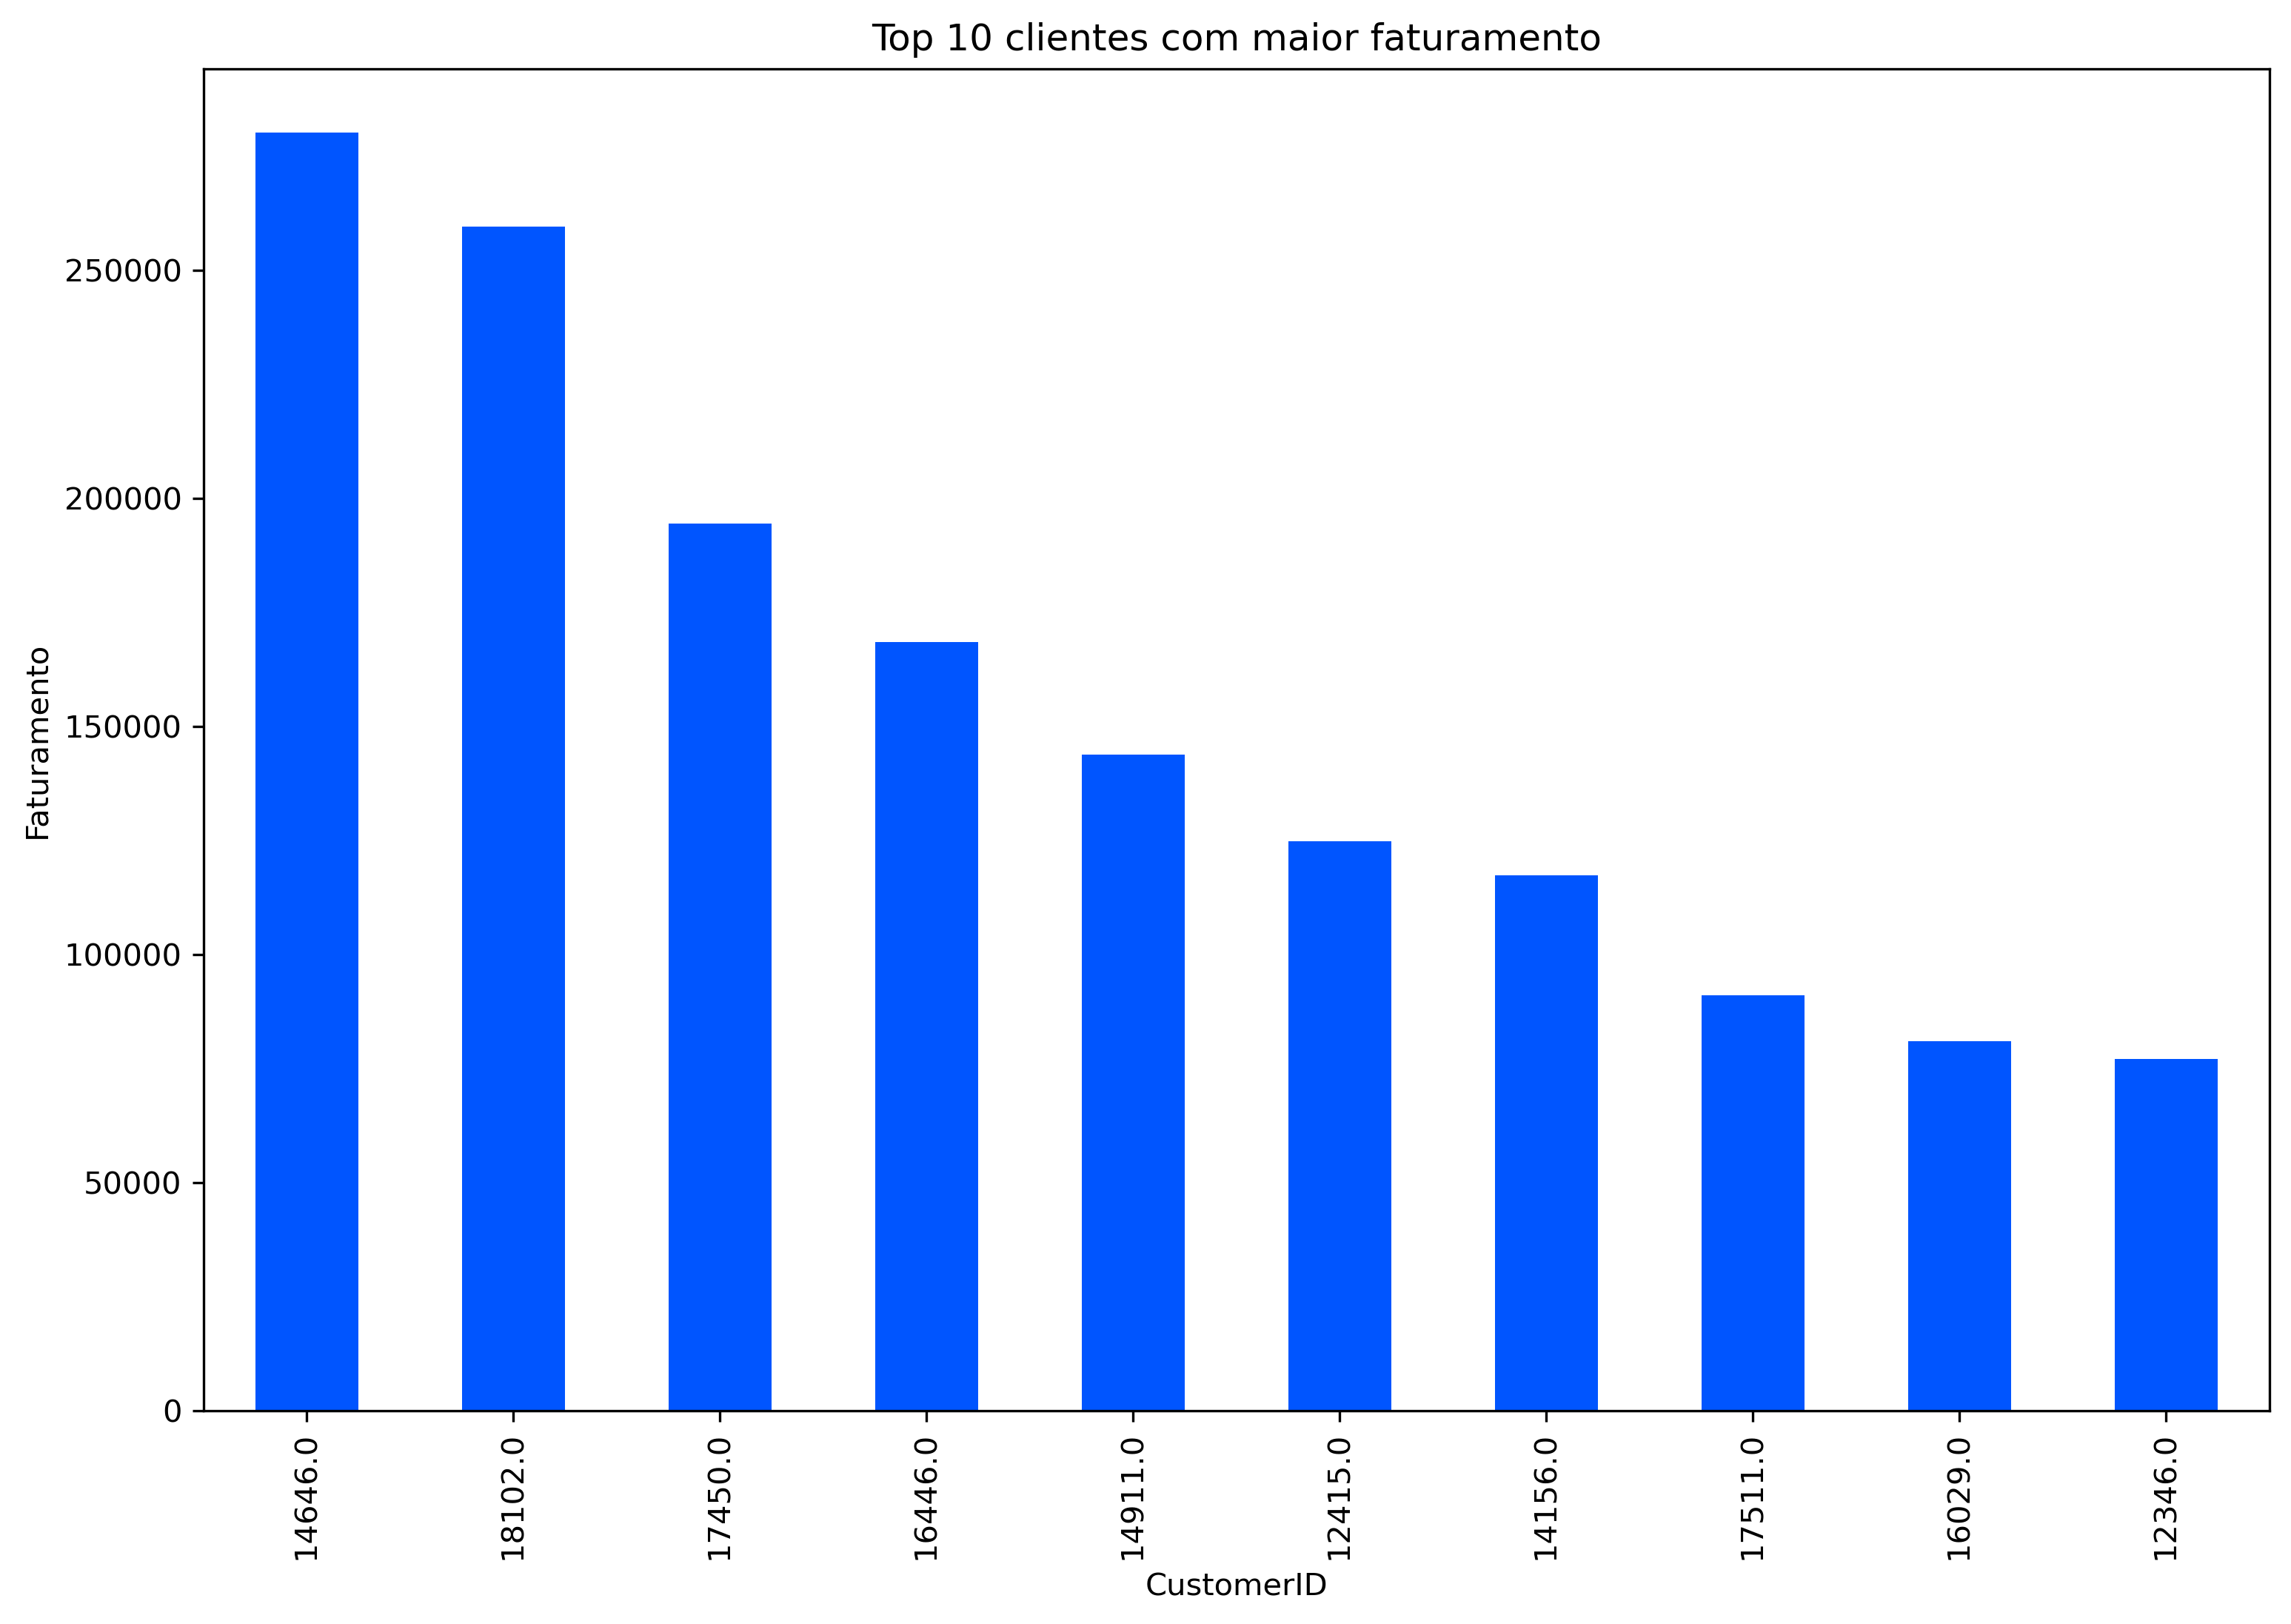

In [43]:
#Agrupamento de cliente por somatórtio
gasto_por_cliente = df2.groupby('CustomerID')\
    .sum().sort_values(by='TotalPrice', 
                       ascending=False)

gasto_por_cliente.iloc[:10]['TotalPrice'].plot(kind='bar', color='#0055FF', alpha=1);
plt.title('Top 10 clientes com maior faturamento')
plt.ylabel('Faturamento')

Text(0, 0.5, 'Quantity')

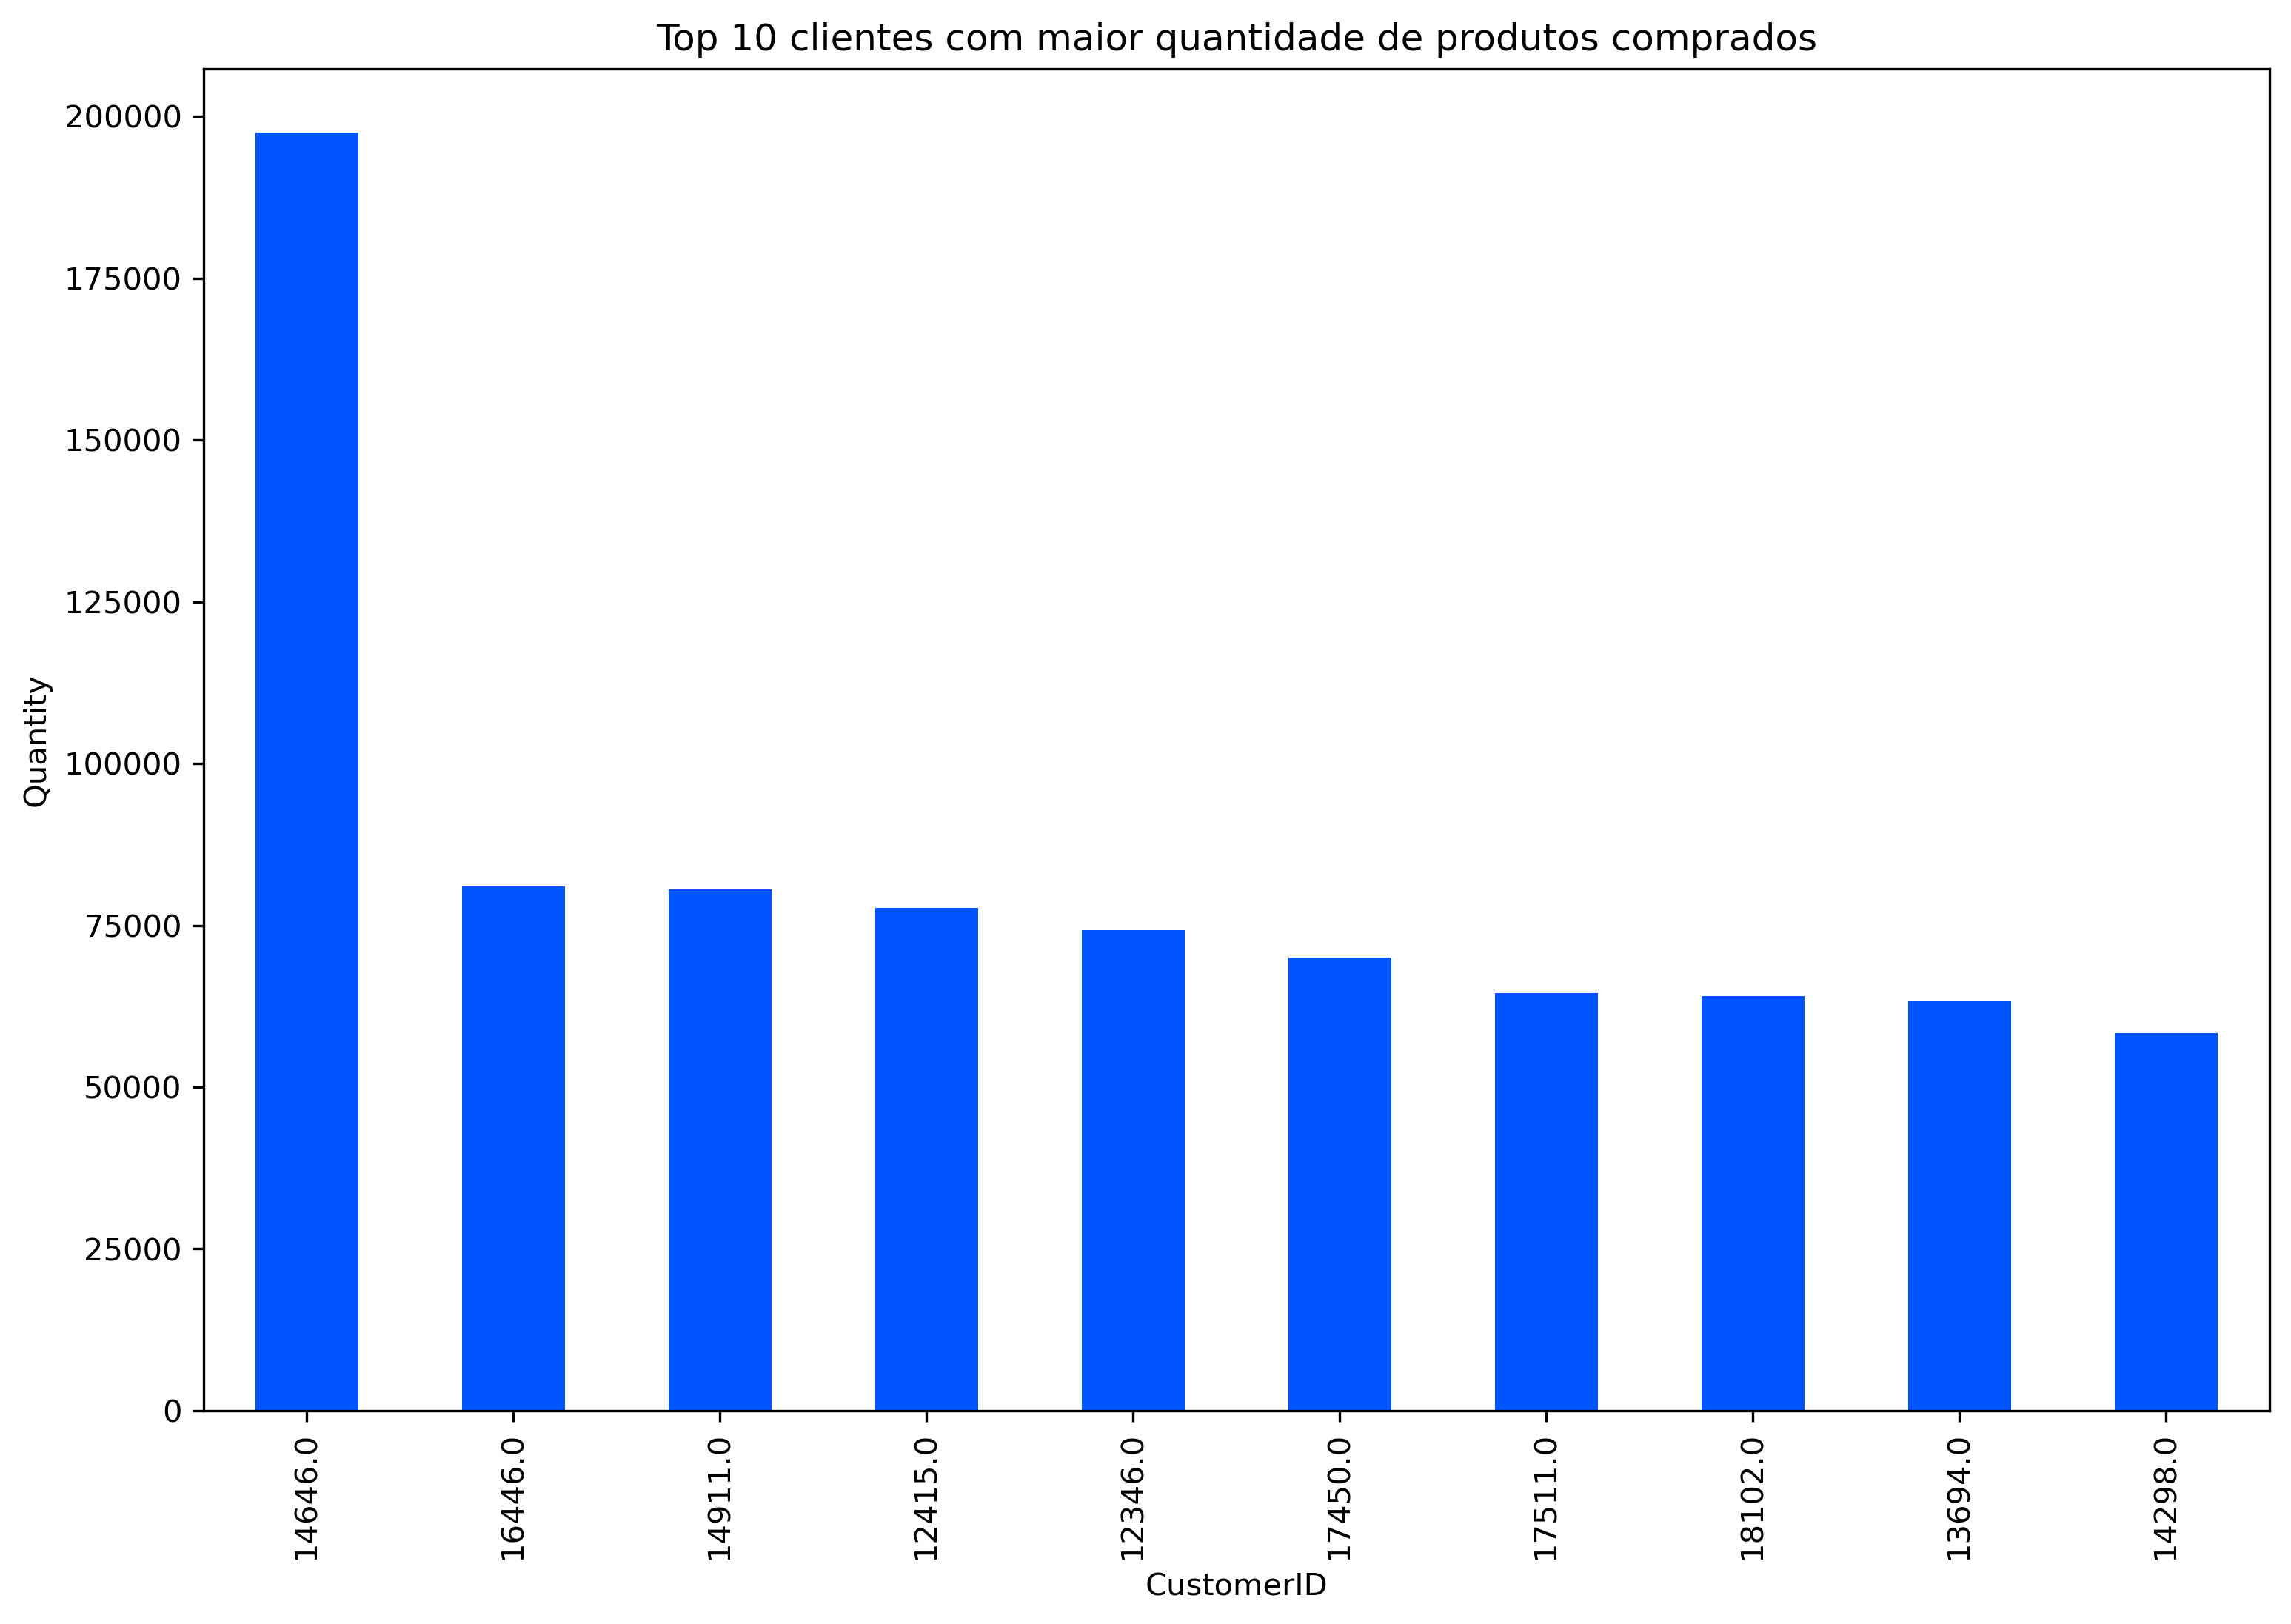

In [45]:
#Agrupamento de cliente por somatórtio
qtd_produtos_por_cliente = df2.groupby('CustomerID')\
    .sum().sort_values(by='Quantity', 
                       ascending=False)

qtd_produtos_por_cliente.iloc[:10]['Quantity'].plot(kind='bar',  color='#0055FF')
plt.title('Top 10 clientes com maior quantidade de produtos comprados')
plt.ylabel('Quantity')

O melhor cliente dessa empresa é o cliente com CustomerID = 14646, pois ele é o cliente com maior gasto no período e ao mesmo tempo é o cliente que compra mais quantidade de produtos.

Considerando uma lista dos 10 melhores clientes por código podemos citar os clientes 14646, 18102, 17450, 16446, 14911, 12415, 14156, 17551, 16029, 12346, pois eles que contribuiram mais com o faturamento da empresa durante esse período.

**Qual o produto mais caro vendido?**


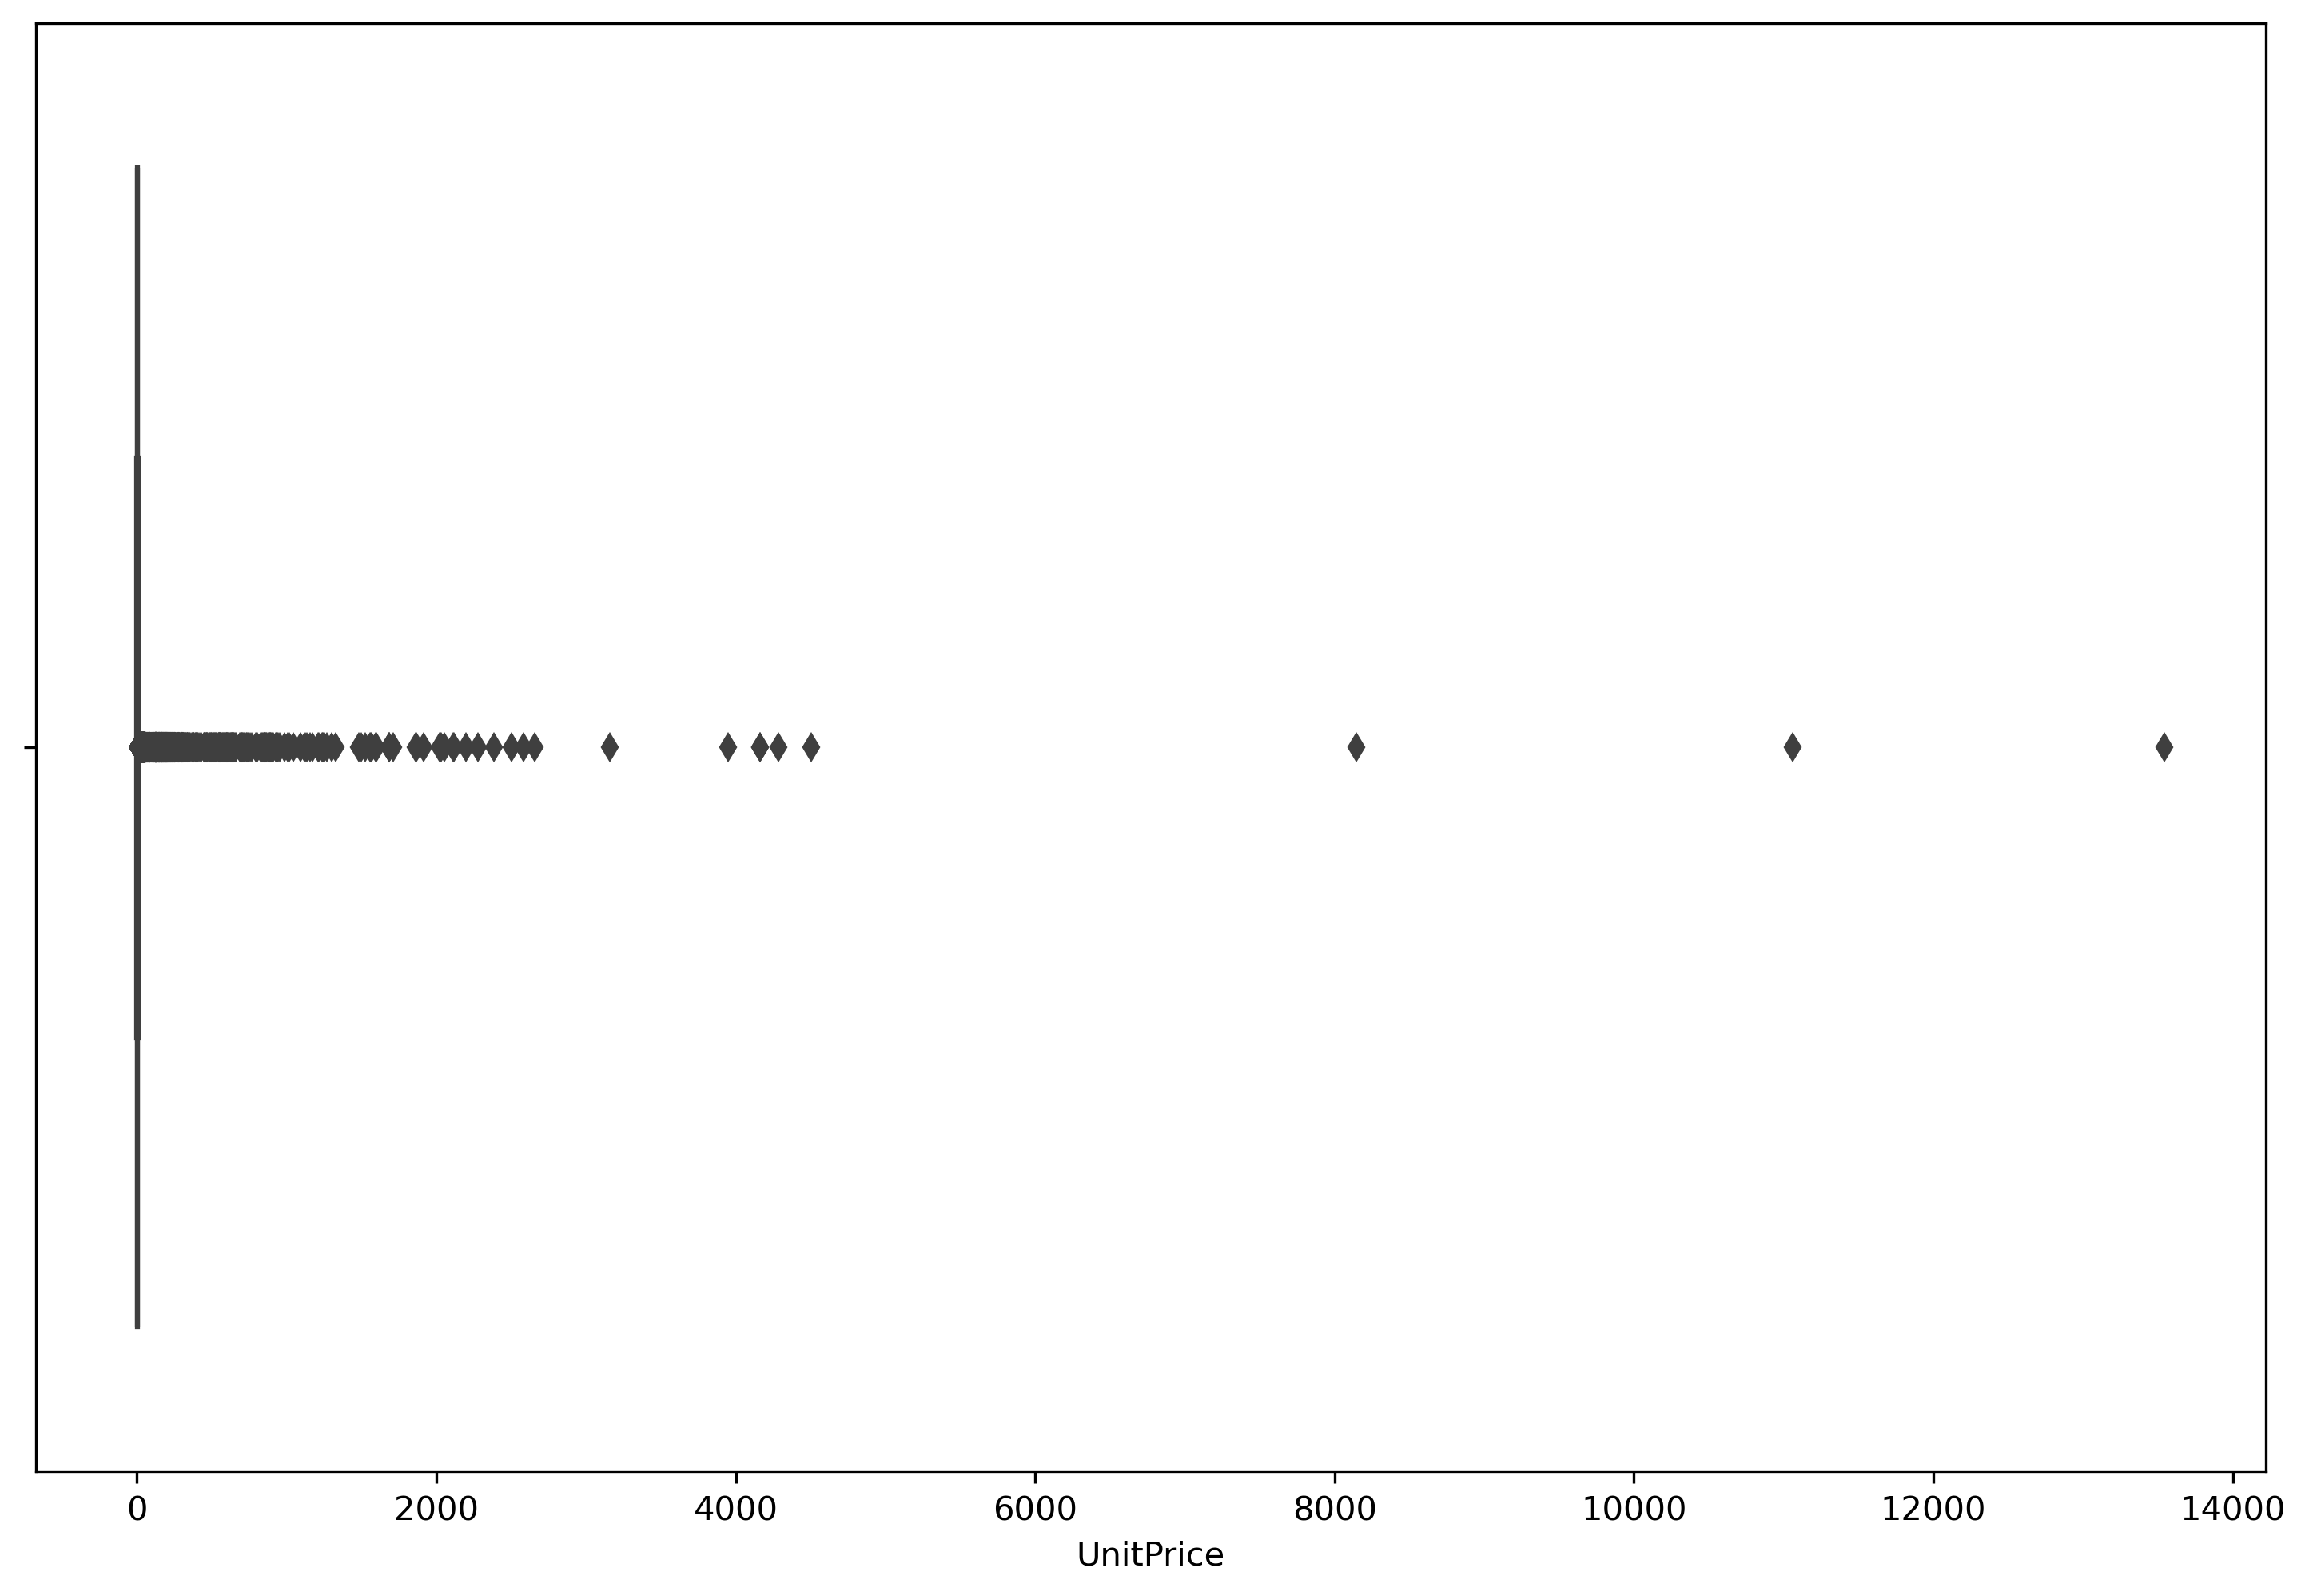

In [46]:
#Variável UnitPrice
ax = sns.boxplot(df2['UnitPrice'])

O preço Unitário dos produtos possuem diversos outliers, quais produtos são esses? Faz sentido eles permanerecerem na análise?

In [294]:
df2.sort_values(by='UnitPrice', ascending=False).iloc[0:50]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
15017,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,NaN,United Kingdom,13541.33
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom,11062.06
173382,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029,United Kingdom,8142.75
297723,562955,DOT,DOTCOM POSTAGE,1,2011-08-11 10:14:00,4505.17,NaN,United Kingdom,4505.17
268028,560373,M,Manual,1,2011-07-18 12:30:00,4287.63,NaN,United Kingdom,4287.63
422376,573080,M,Manual,1,2011-10-27 14:20:00,4161.06,12536,France,4161.06
422351,573077,M,Manual,1,2011-10-27 14:13:00,4161.06,12536,France,4161.06
406406,571751,M,Manual,1,2011-10-19 11:18:00,3949.32,12744,Singapore,3949.32
374542,569382,M,Manual,1,2011-10-03 16:44:00,3155.95,15502,United Kingdom,3155.95
347948,567353,M,Manual,1,2011-09-19 16:14:00,2653.95,NaN,Hong Kong,2653.95


Considerando que a base está correta e todo o conteúdo da base são produtos válidos o produto mais caro é o AmazonFee custando 13541.33.

In [47]:
produto_mais_caro = df2[df2['UnitPrice']==df2['UnitPrice'].max()]
produto_mais_caro

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
14775,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,NaN,United Kingdom,13541.33


**Quais os países (Country) que fazem parte deste conjunto de dados?**

In [297]:
df2['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Bahrain', 'Israel', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

**Qual a compra (InvoiceNo) que possui mais itens?**

Text(0, 0.5, 'Quantity')

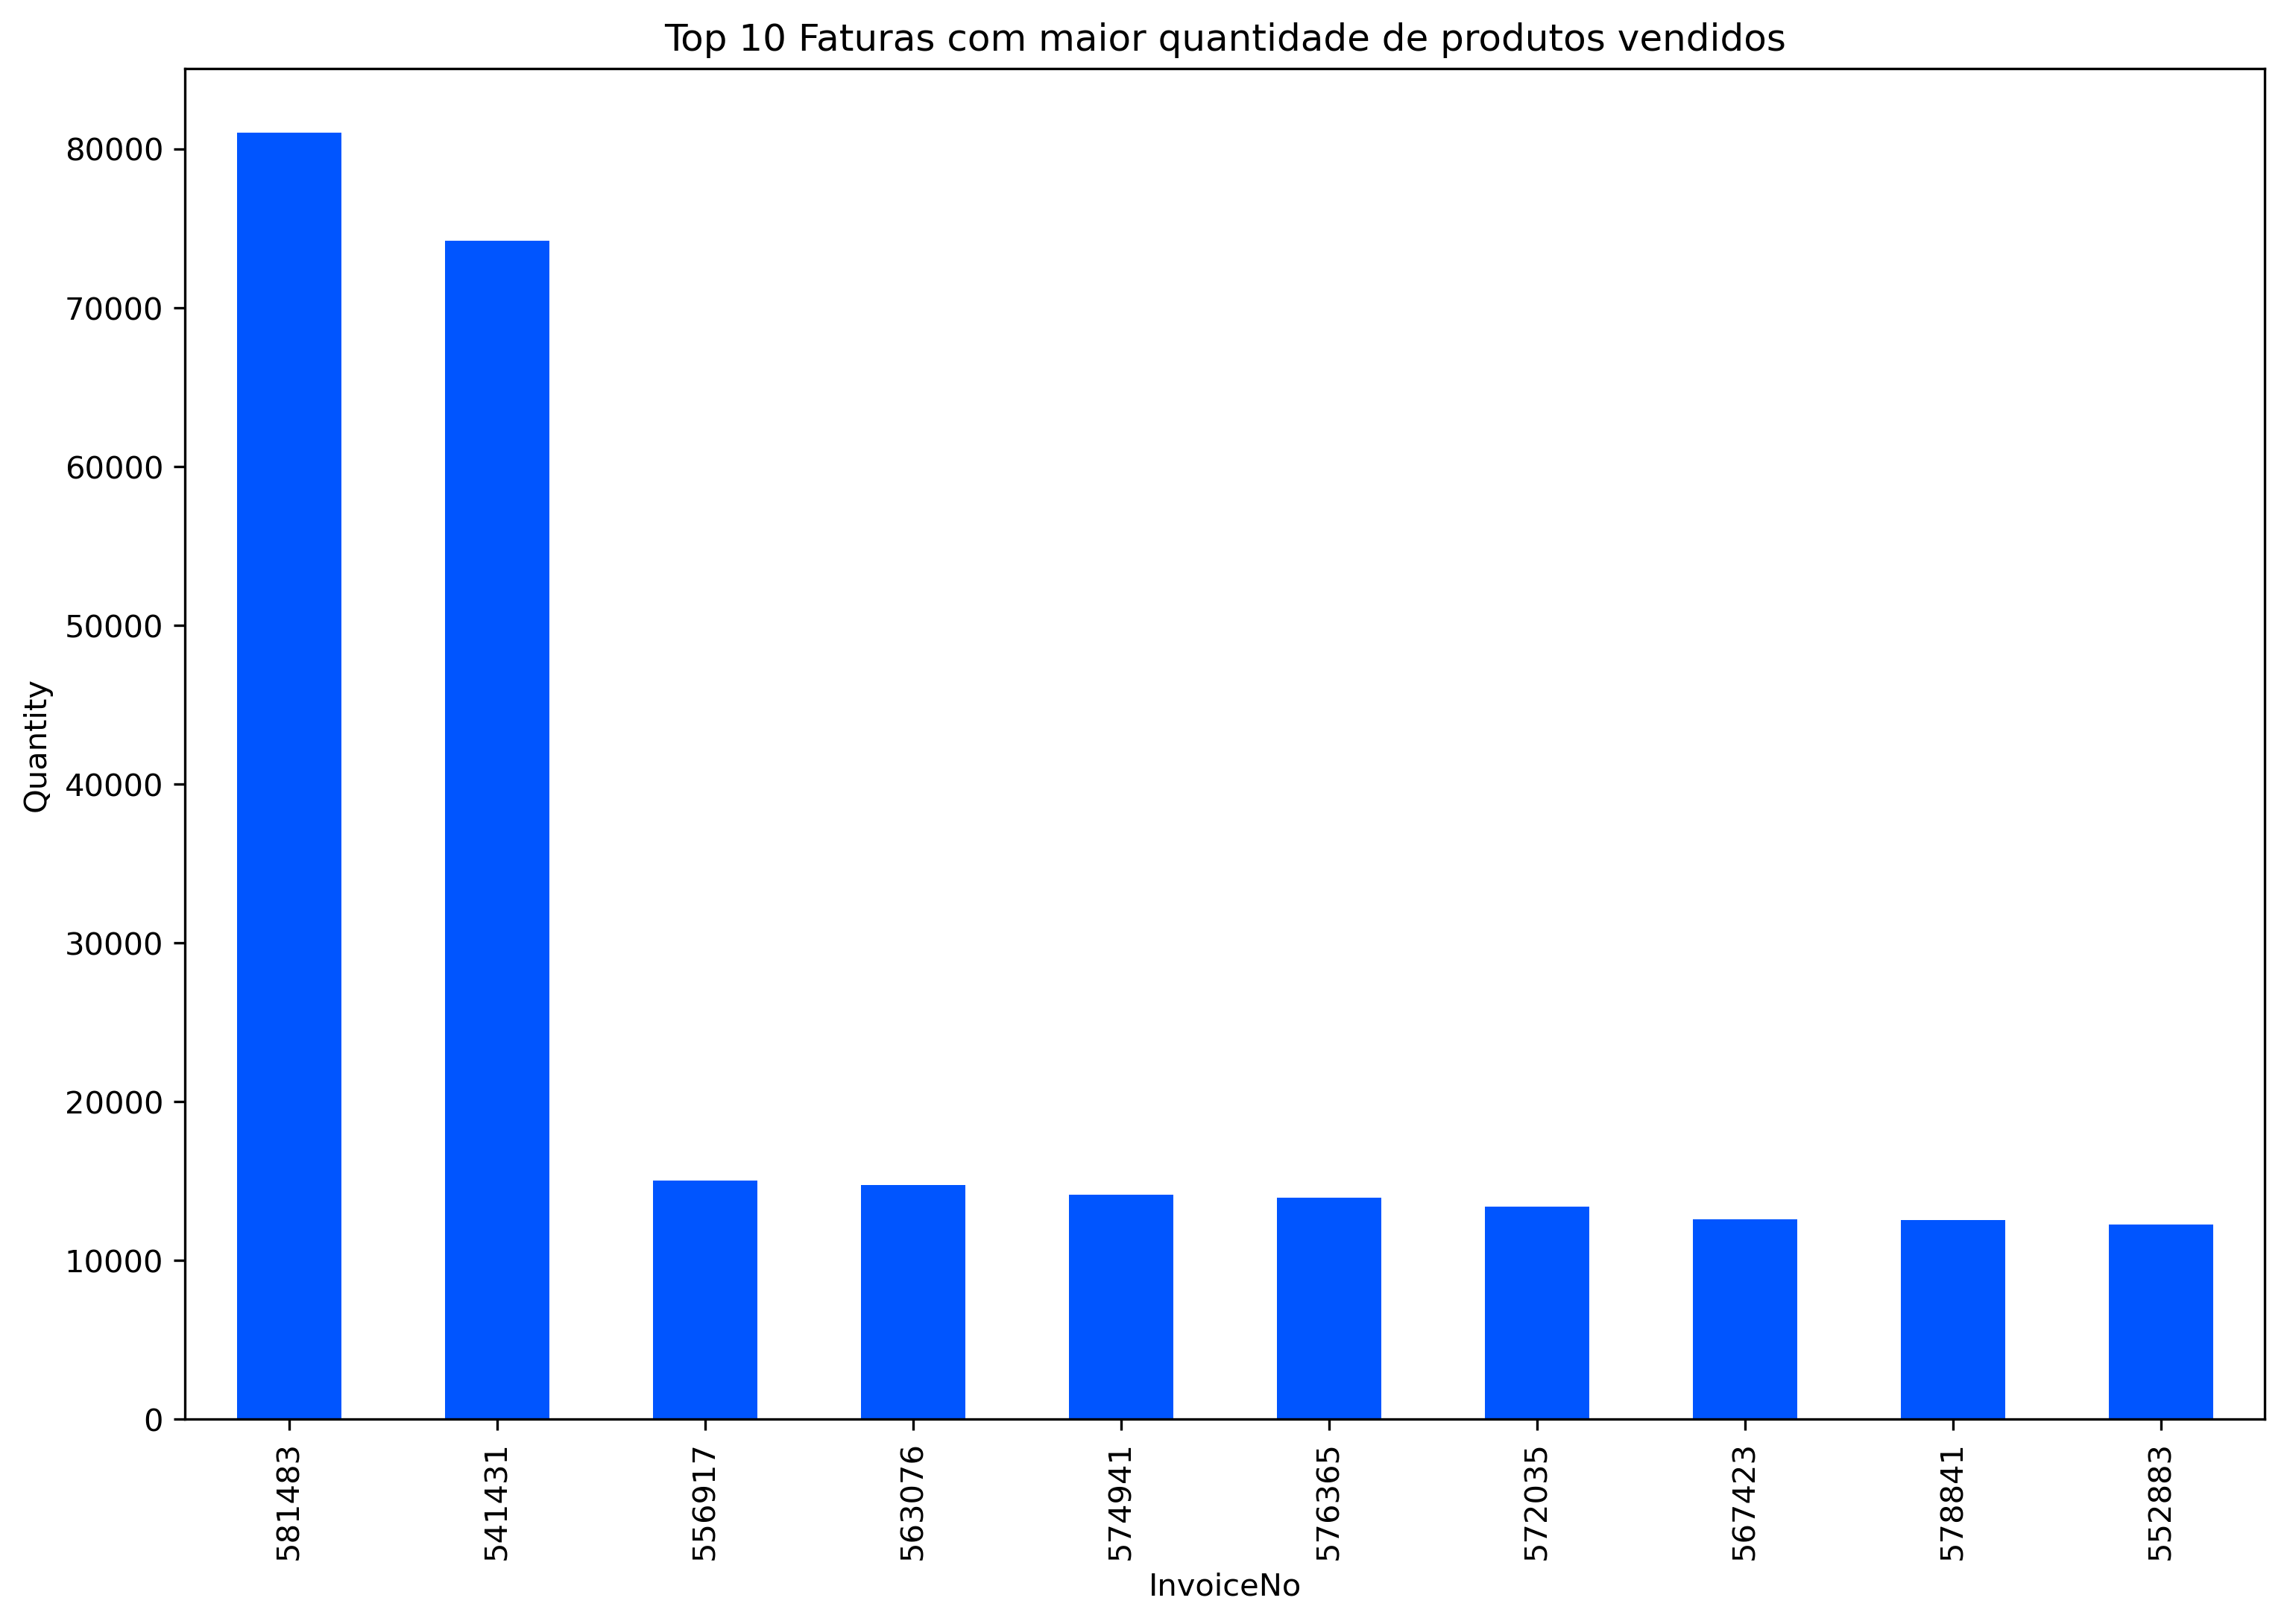

In [49]:
qtd_de_compras_por_InvoiceNo = df2.groupby('InvoiceNo')\
    .sum().sort_values(by='Quantity', ascending=False)

qtd_de_compras_por_InvoiceNo.iloc[:10]['Quantity'].plot(kind='bar', color='#0055FF')
plt.title('Top 10 Faturas com maior quantidade de produtos vendidos')
plt.ylabel('Quantity')

O número de fatura com mais itens ('Quantity') comprados é com a InvoiceNo=581483 com 80995 itens

**Qual a compra (InvoiceNo) que tem o maior valor de compra?**

Text(0, 0.5, 'TotalPrice')

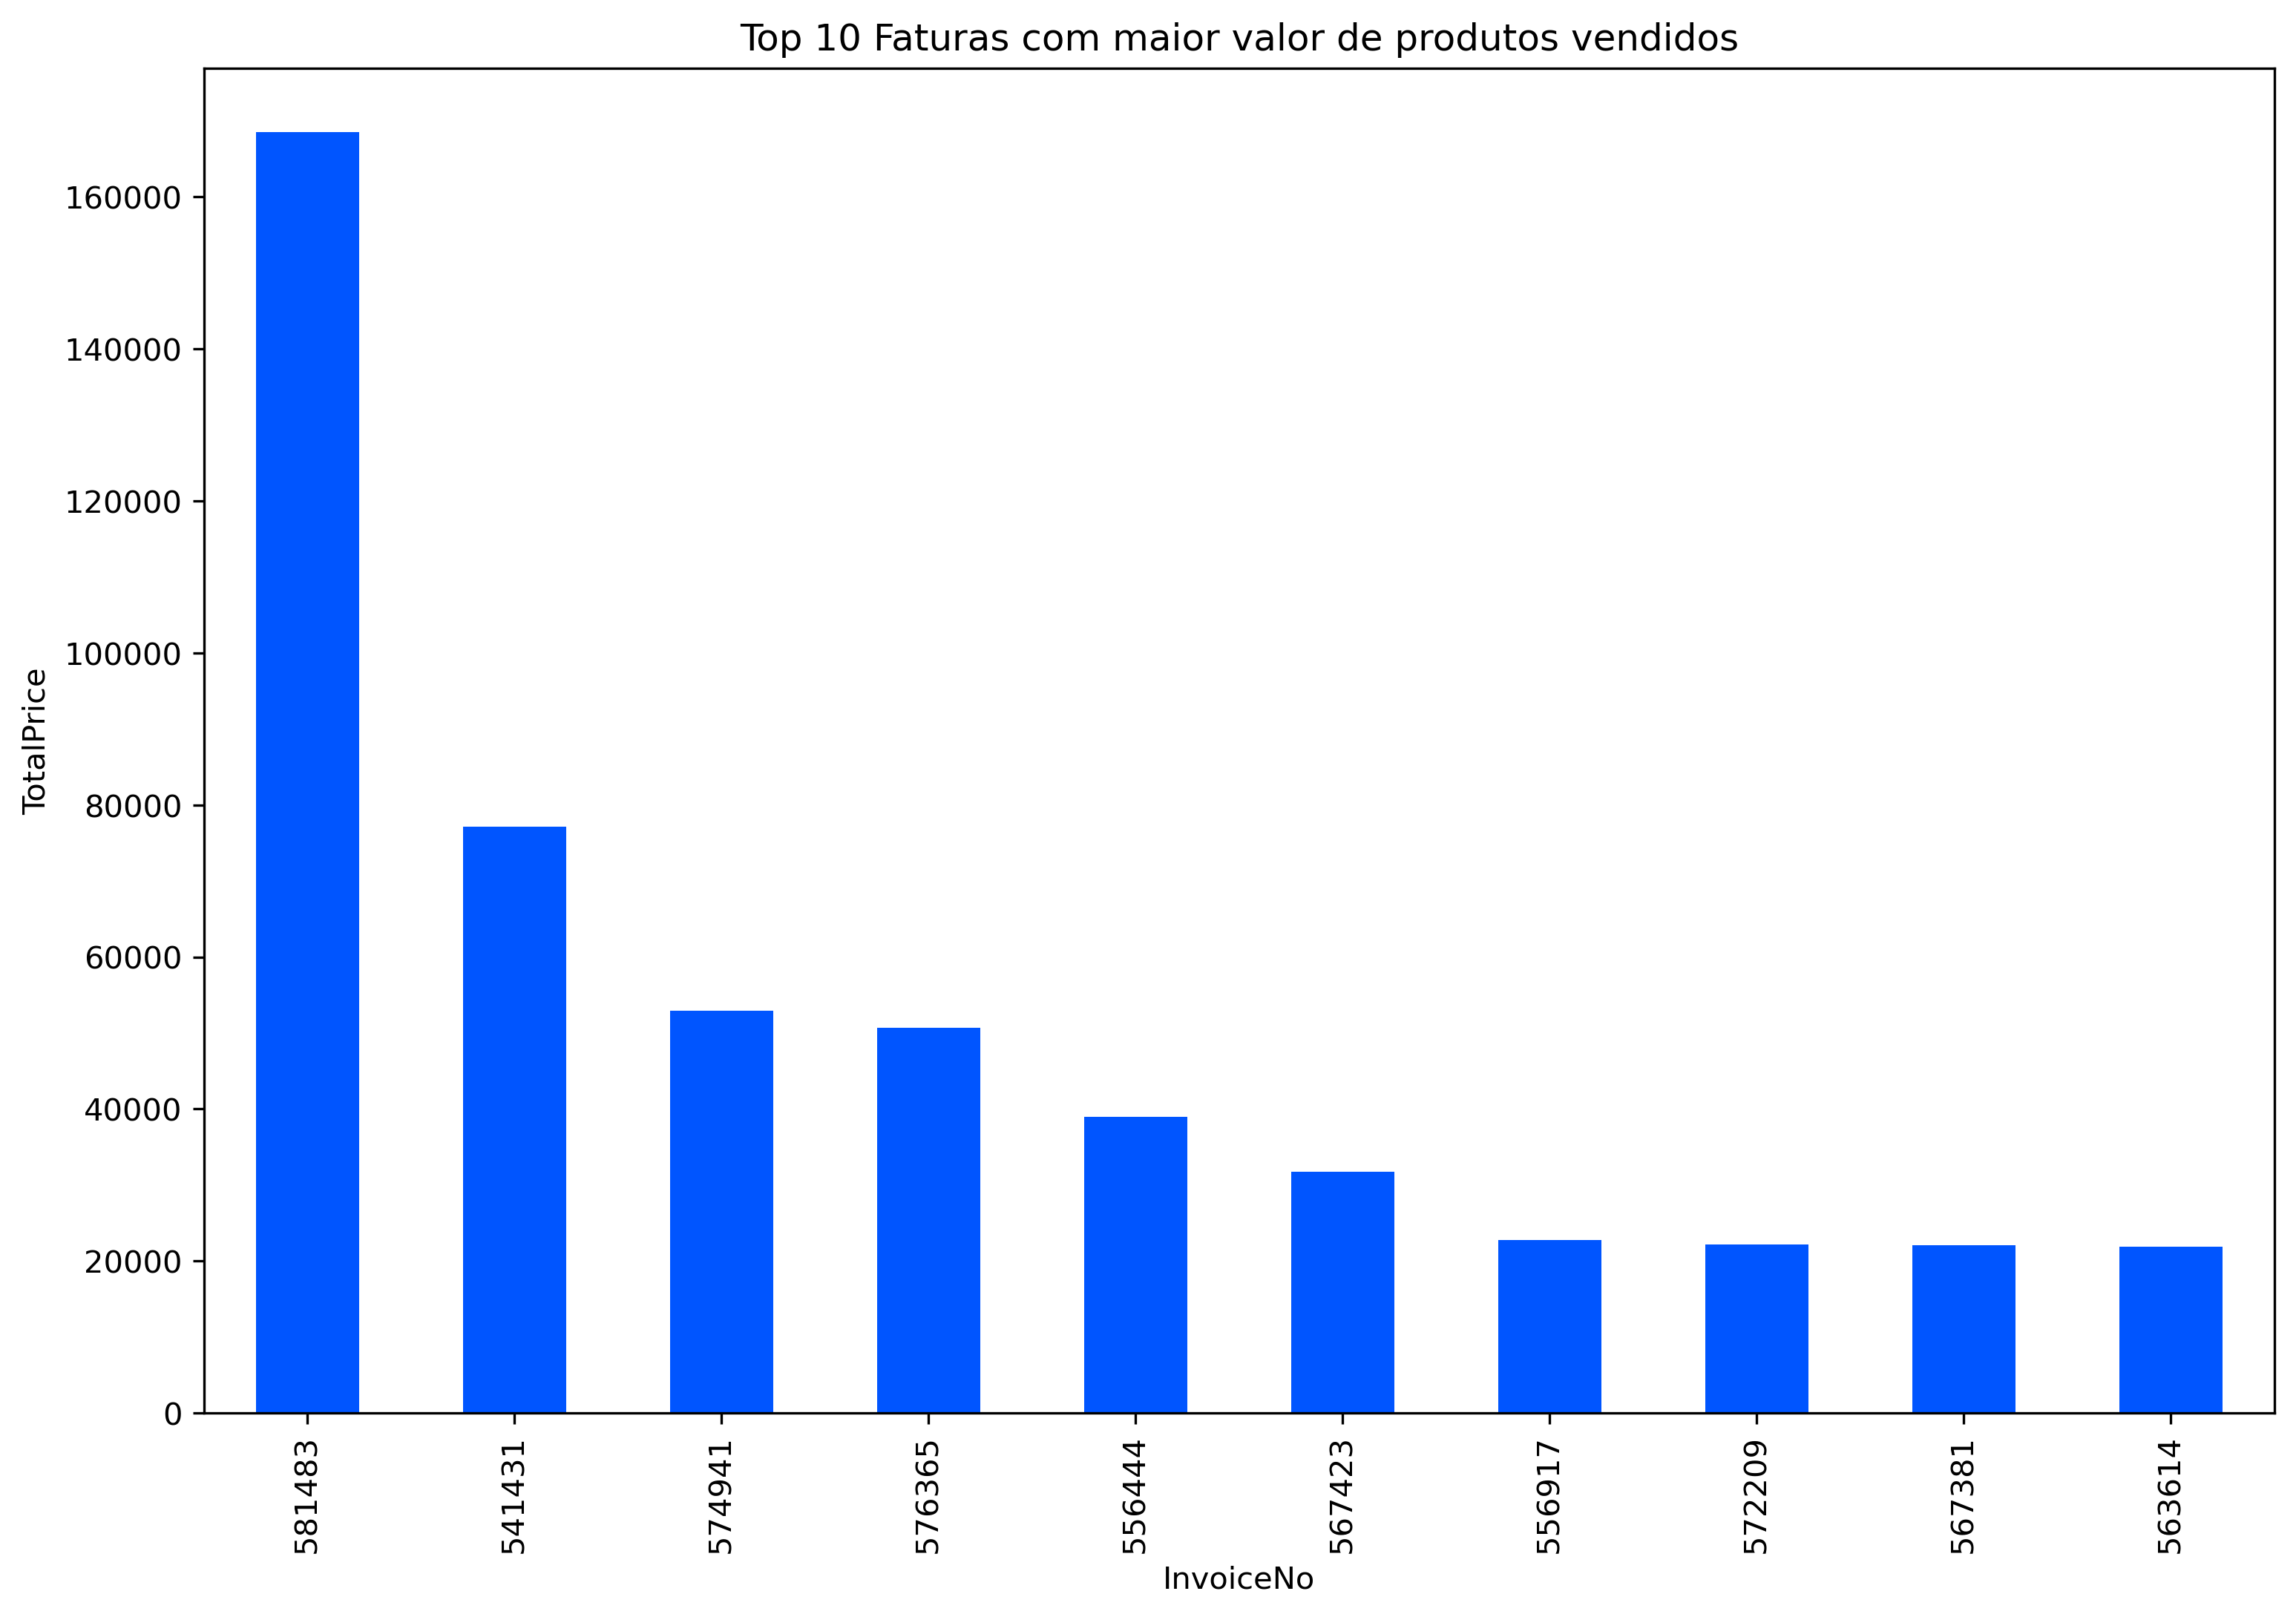

In [52]:
Valor_total_de_compras_por_InvoiceNo = df2.groupby('InvoiceNo')\
    .sum().sort_values(by='TotalPrice', ascending=False)

Valor_total_de_compras_por_InvoiceNo.iloc[:10]['TotalPrice'].plot(kind='bar', color='#0055FF')
plt.title('Top 10 Faturas com maior valor de produtos vendidos')
plt.ylabel('TotalPrice')

O número de fatura com maior valor de compra ('TotalPrice') comprados é com a InvoiceNo=581483 com valor total de 168469.60

**Faça um gráfico de barras mostrando a quantidade vendida total dos 10 primeiros produtos do
conjunto.**

Text(0, 0.5, 'Quantity')

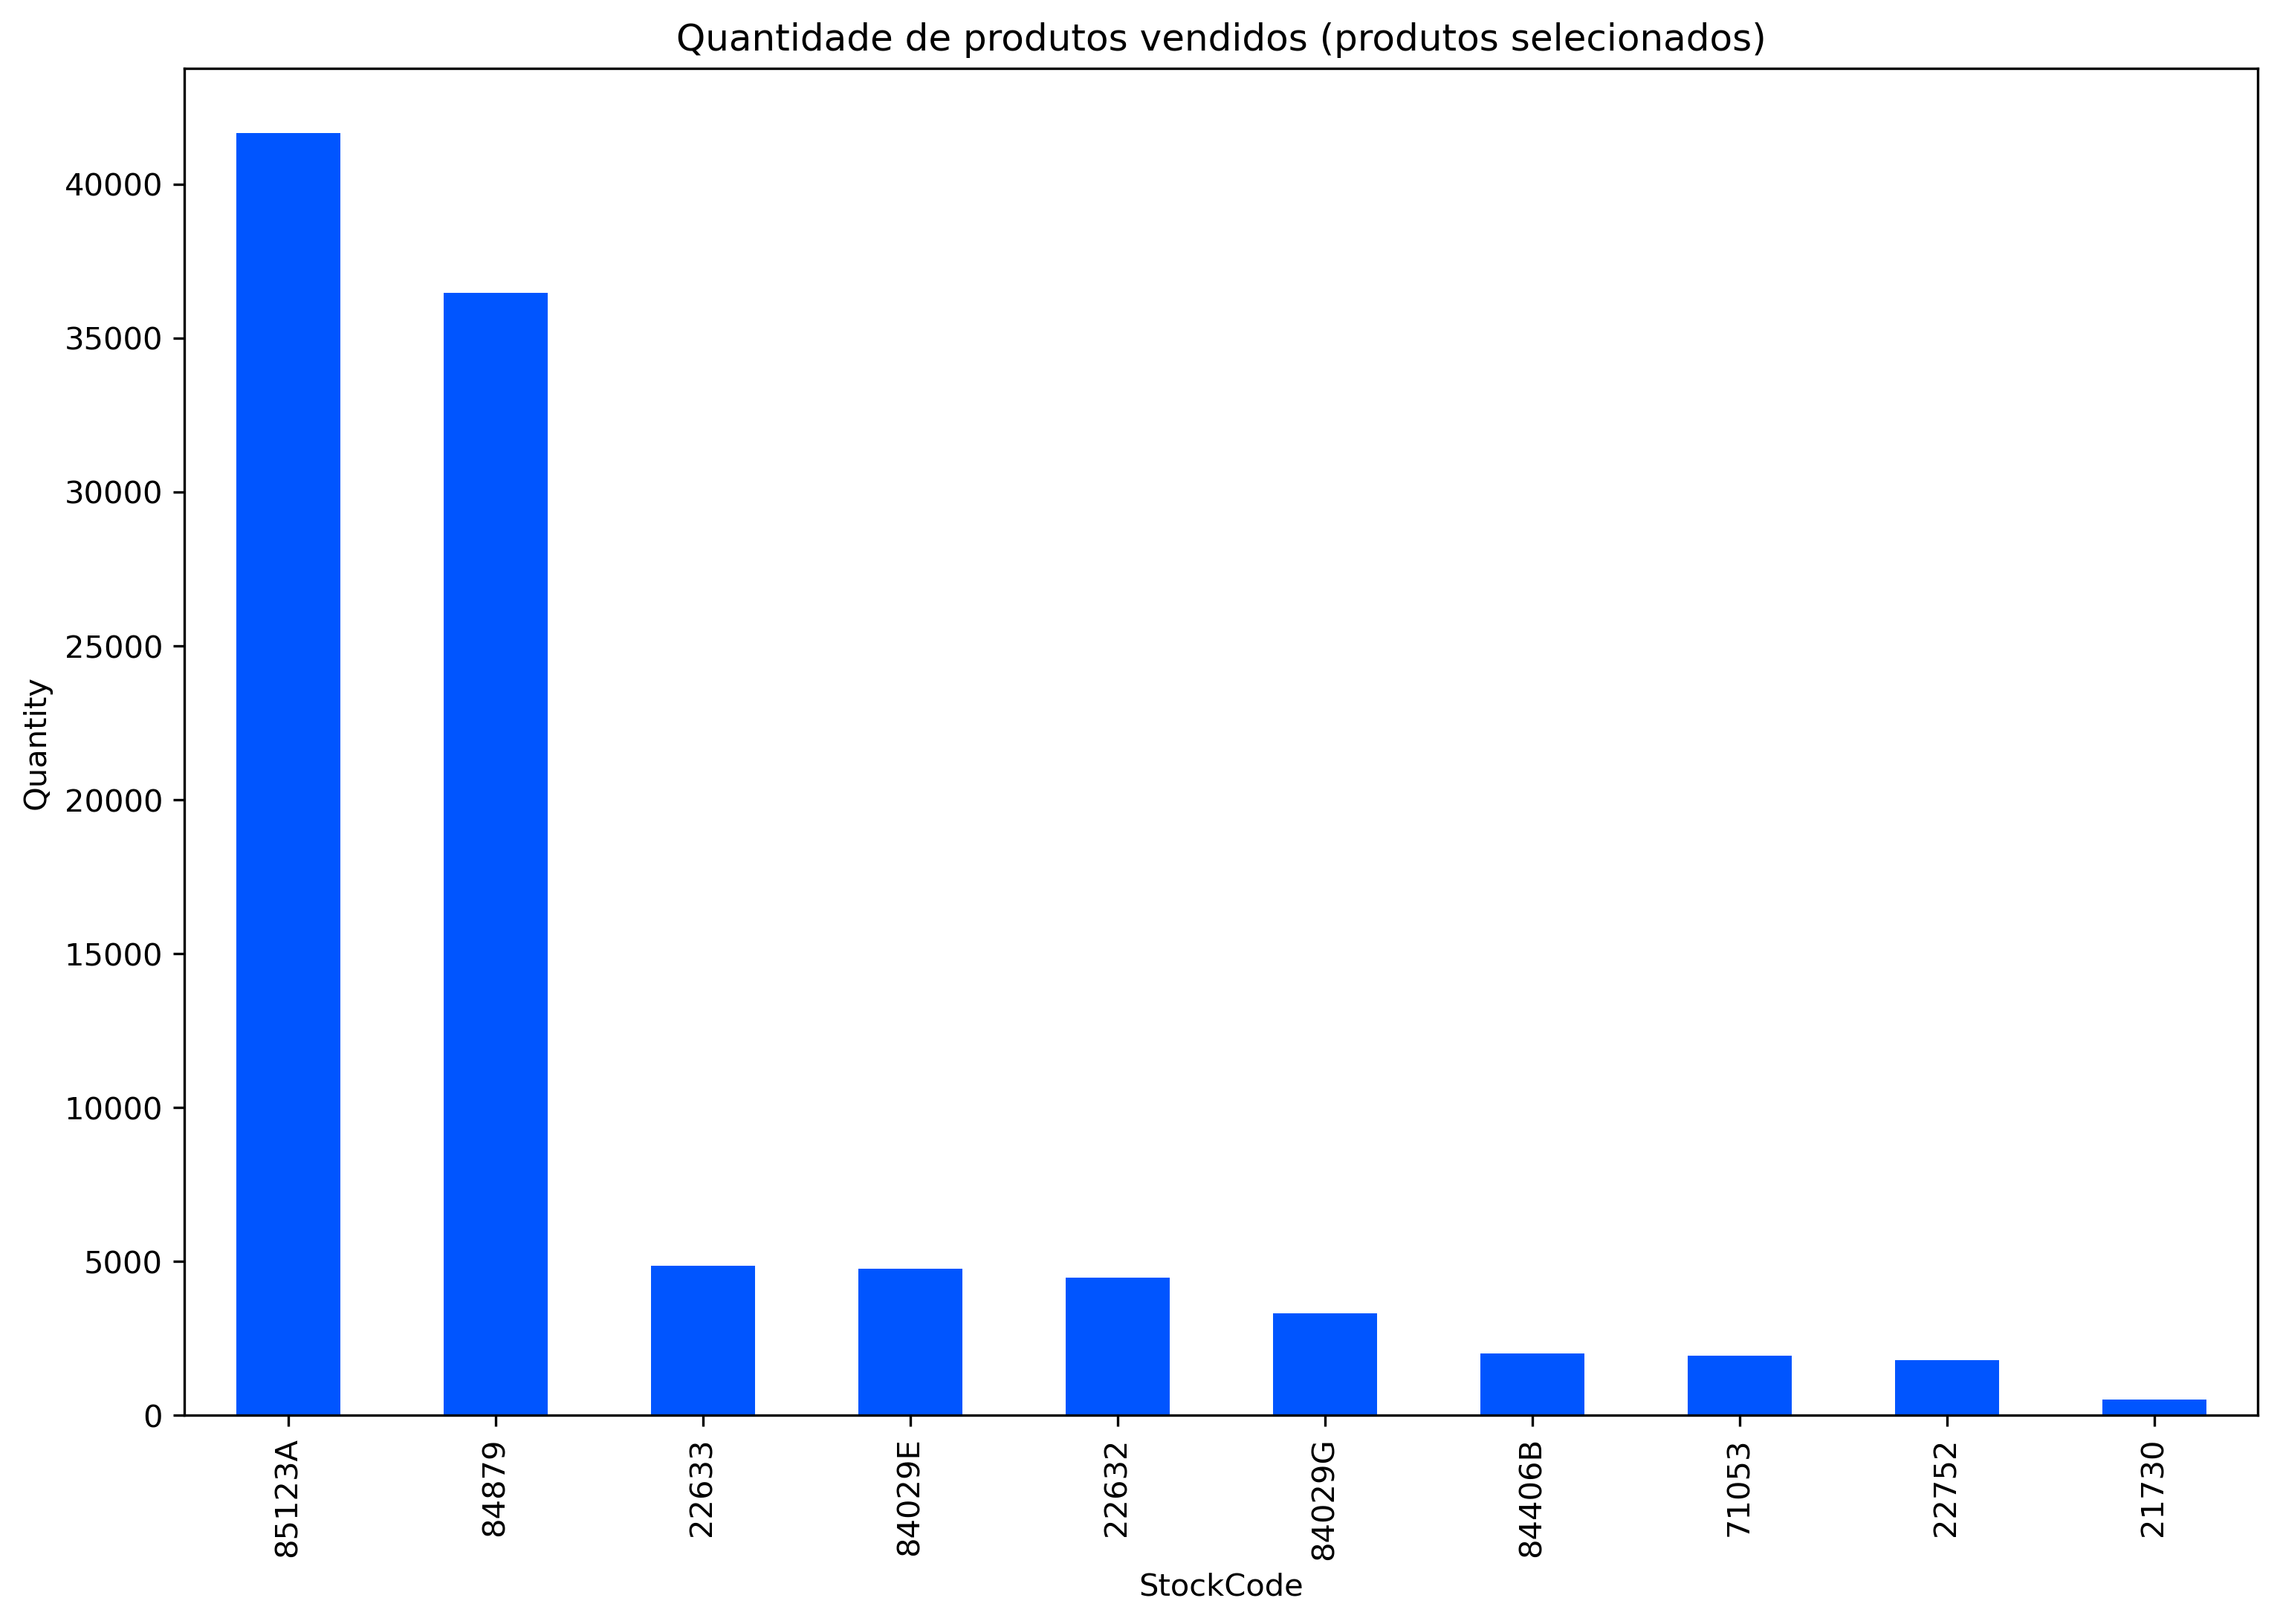

In [54]:
produtos10 = df2['StockCode'].iloc[0:10]
df_produtos10 = df2[df2['StockCode'].isin(produtos10)]

qtd_vendida_produtos10 = df_produtos10.groupby('StockCode')\
    .sum().sort_values(by='Quantity',
                       ascending=False)

qtd_vendida_produtos10['Quantity'].plot(kind='bar', color='#0055FF')
plt.title('Quantidade de produtos vendidos (produtos selecionados)')
plt.ylabel('Quantity')

**Faça um Boxplot dos preços unitários de todos os produtos. Considere somente os 100 produtos mais
vendidos.**


In [55]:
top100_produtos_mais_vendidos = df2.groupby('StockCode')\
     .sum().sort_values(by='Quantity',
                       ascending=False).iloc[0:100].index

df_100maisvendidos = df2[df2['StockCode'].isin(top100_produtos_mais_vendidos)]

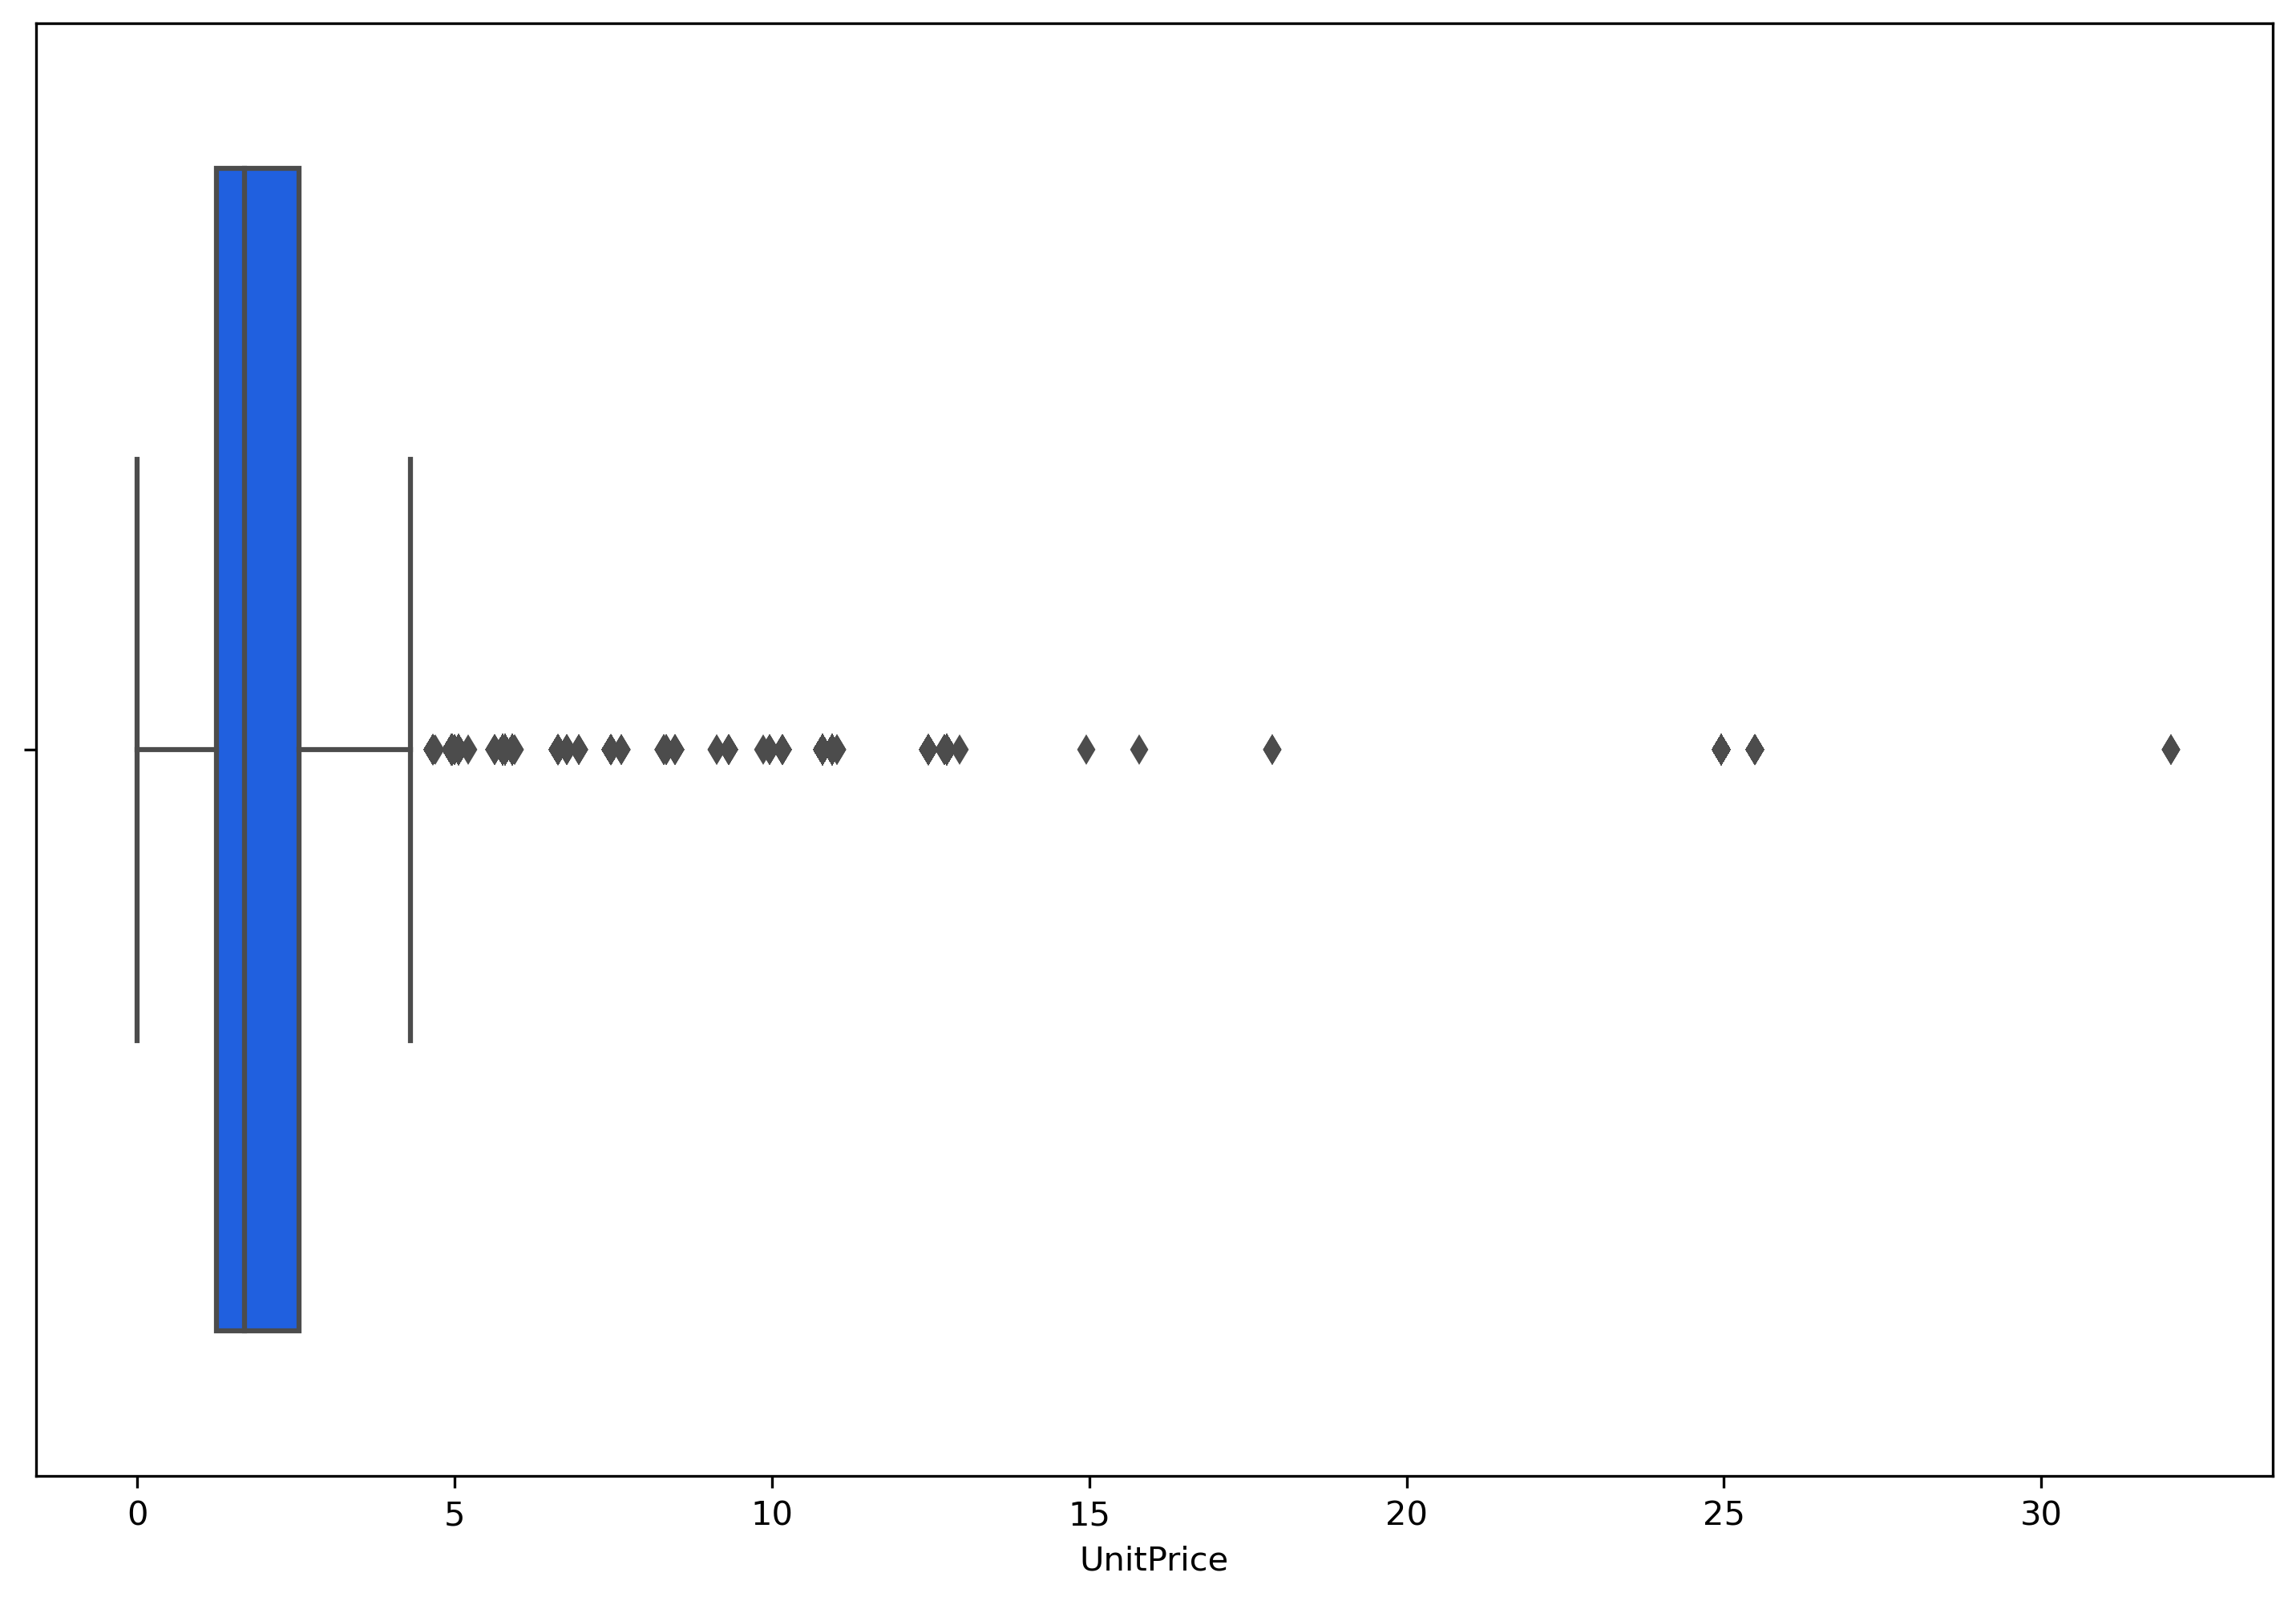

In [56]:
ax = sns.boxplot(df_100maisvendidos['UnitPrice'],color='#0055FF')

**Faça um gráfico de linhas mostrando o faturamento (total de vendas) por dia.**

In [57]:
df2['InvoiceDate'] = df2['InvoiceDate'].astype('datetime64[D]')

In [127]:
Total_de_vendas_por_dia = df2.groupby('InvoiceDate').sum()
Total_de_vendas_por_dia.reset_index(inplace=True)
Total_de_vendas_por_dia.index = Total_de_vendas_por_dia['InvoiceDate'].values

As datas abaixo mostram os dias que não existiram vendas.

In [129]:
pd.date_range(start=Total_de_vendas_por_dia.index.min(), end=Total_de_vendas_por_dia.index.max()).difference(Total_de_vendas_por_dia.index)

DatetimeIndex(['2010-12-04', '2010-12-11', '2010-12-18', '2010-12-24',
               '2010-12-25', '2010-12-26', '2010-12-27', '2010-12-28',
               '2010-12-29', '2010-12-30', '2010-12-31', '2011-01-01',
               '2011-01-02', '2011-01-03', '2011-01-08', '2011-01-15',
               '2011-01-22', '2011-01-29', '2011-02-05', '2011-02-12',
               '2011-02-19', '2011-02-26', '2011-03-05', '2011-03-12',
               '2011-03-19', '2011-03-26', '2011-04-02', '2011-04-09',
               '2011-04-16', '2011-04-22', '2011-04-23', '2011-04-24',
               '2011-04-25', '2011-04-29', '2011-04-30', '2011-05-02',
               '2011-05-07', '2011-05-14', '2011-05-21', '2011-05-28',
               '2011-05-30', '2011-06-04', '2011-06-11', '2011-06-18',
               '2011-06-25', '2011-07-02', '2011-07-09', '2011-07-16',
               '2011-07-23', '2011-07-30', '2011-08-06', '2011-08-13',
               '2011-08-20', '2011-08-27', '2011-08-29', '2011-09-03',
      

Como será plotado uma série temporal, serão incluídas as datas que não estão presentes na base de dados sendo inputados com o valor zero.
Isso melhora a vizualização com relação aos dias que compras foram feitas e os dias que não houve vendas online.

In [130]:
#Criação de uma base de dados contendo todas as datas do período
df_calendario = pd.DataFrame(pd.date_range(start=Total_de_vendas_por_dia.index.min(), end=Total_de_vendas_por_dia.index.max()), columns=['InvoiceDate'])


Total_de_vendas_por_dia = df_calendario.merge(Total_de_vendas_por_dia, how='left', on=['InvoiceDate'] ).fillna(0)

In [133]:
Total_de_vendas_por_dia.index = Total_de_vendas_por_dia['InvoiceDate'].values

Text(0, 0.5, 'Datas')

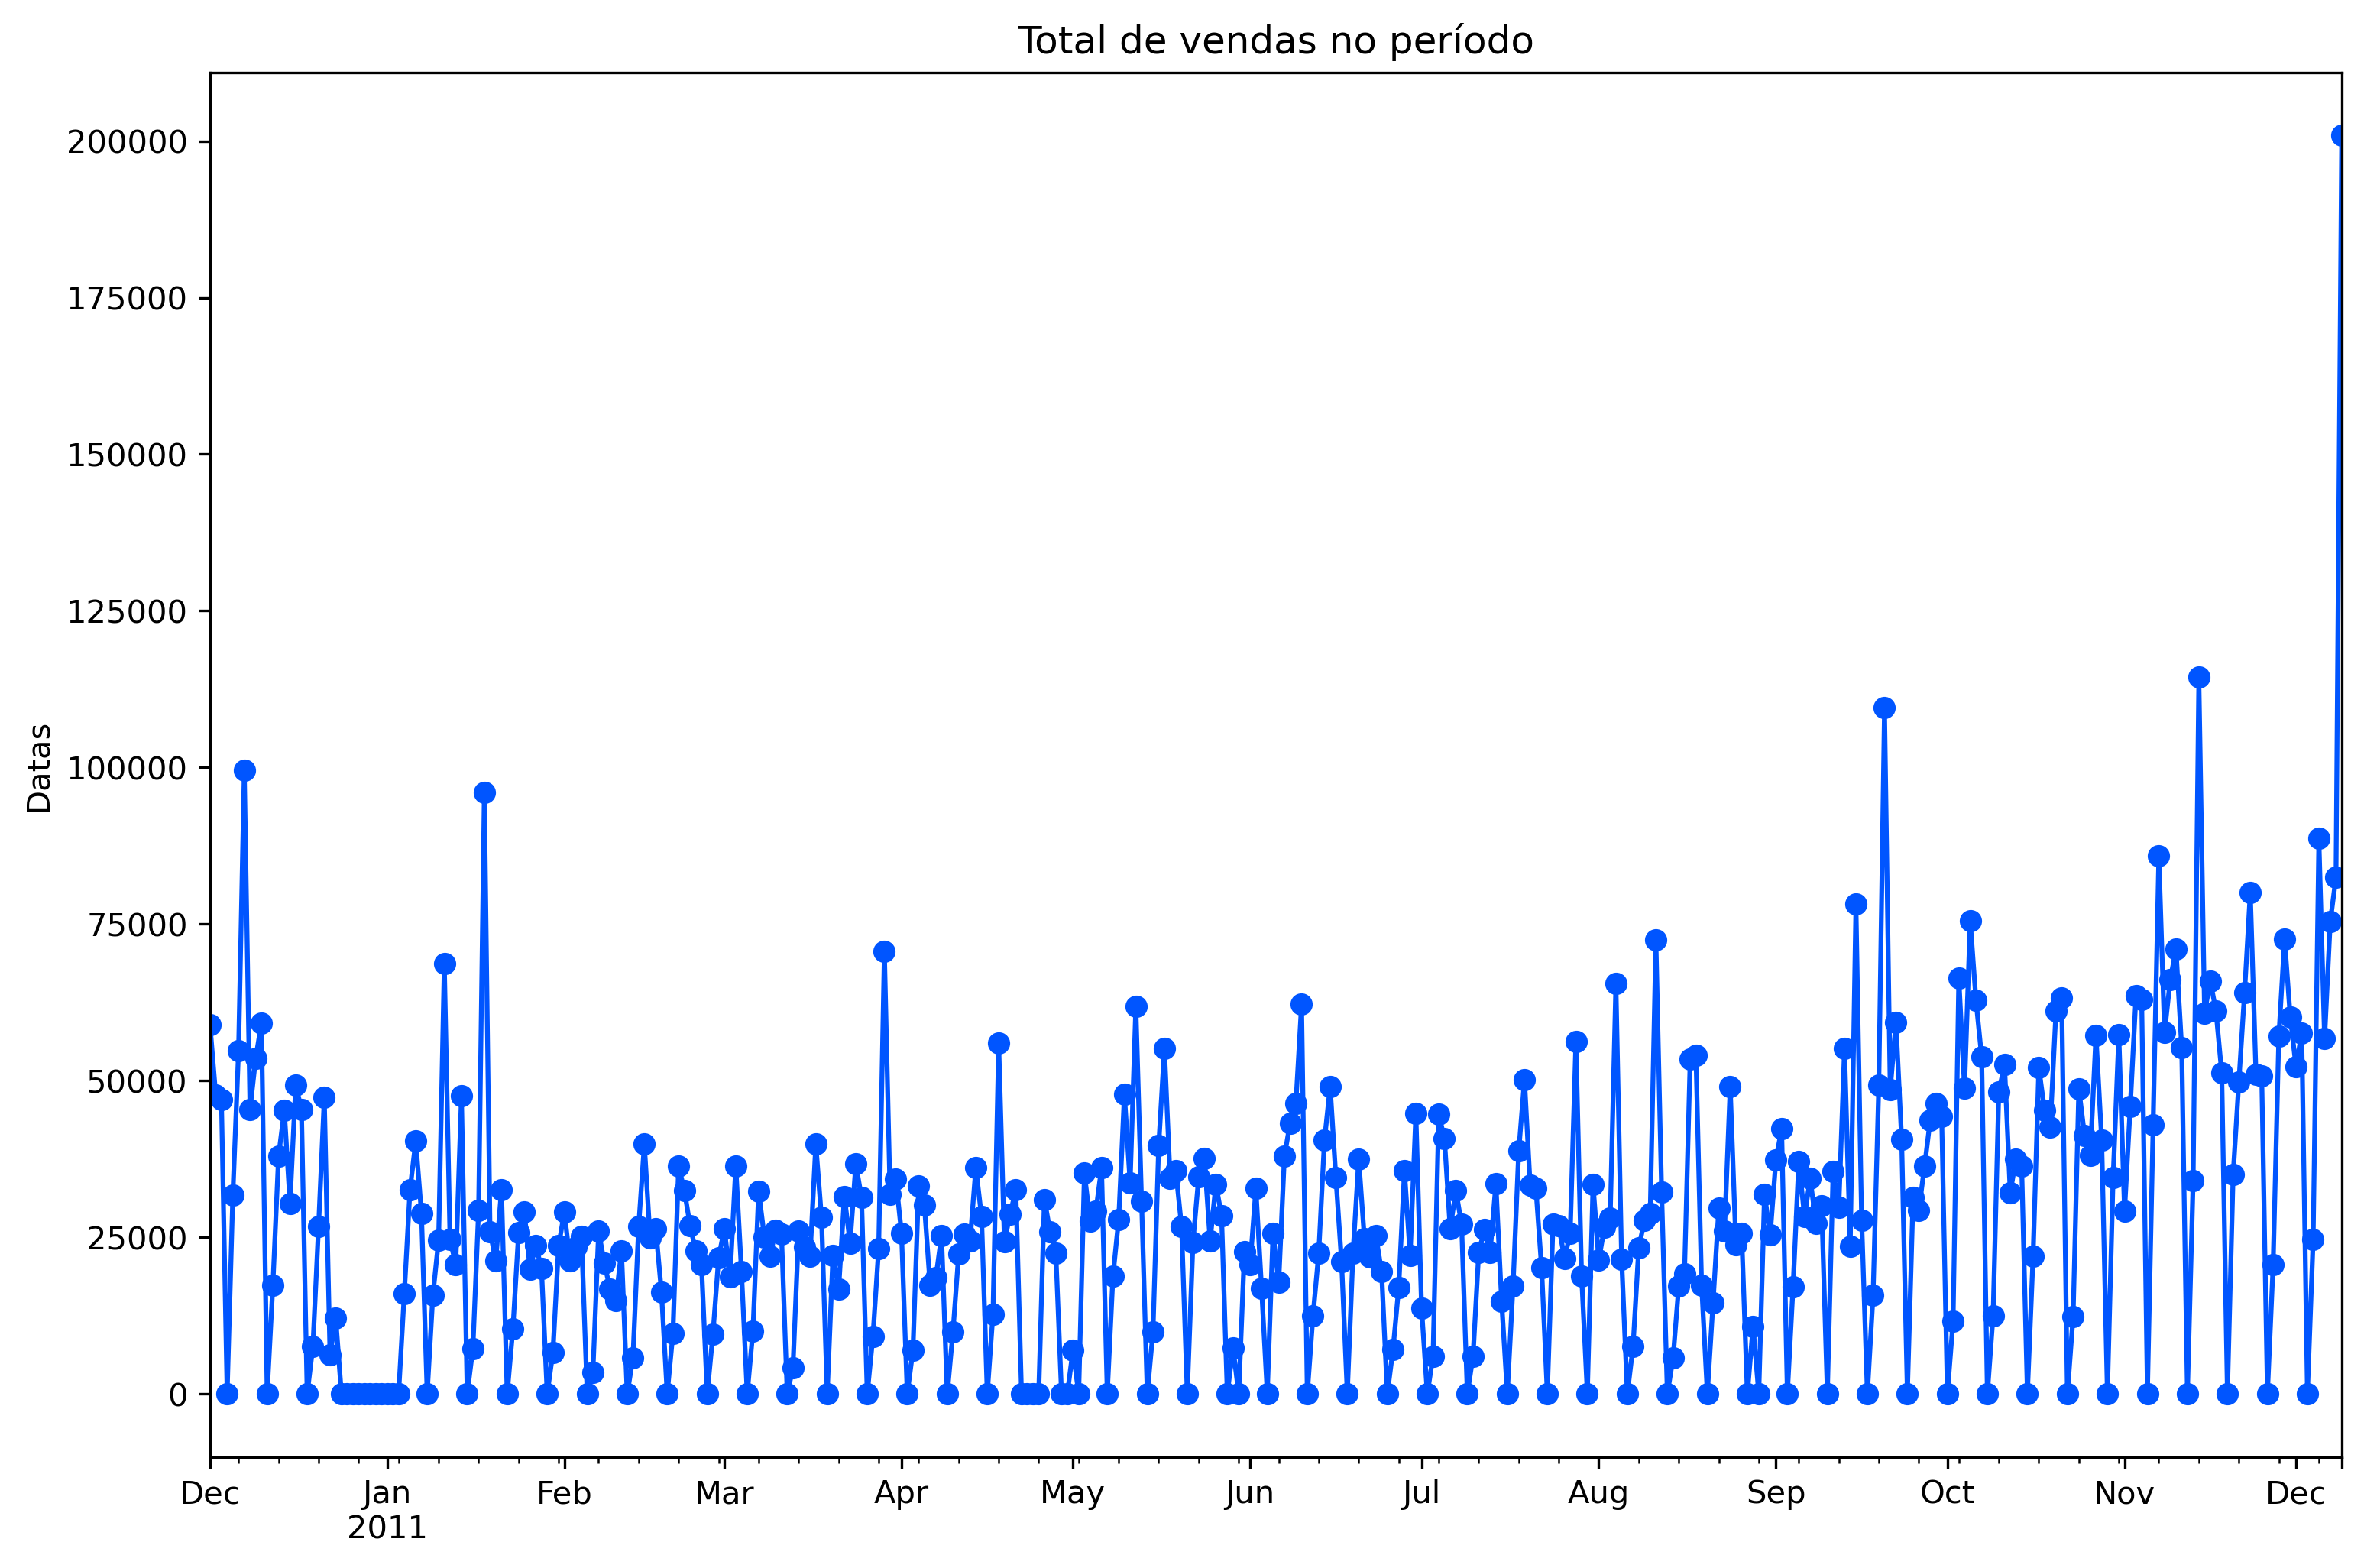

In [137]:
Total_de_vendas_por_dia['TotalPrice'].plot(color='#0055FF', marker='o')
plt.title('Total de vendas no período')
plt.ylabel('Faturamento')
plt.ylabel('Datas')

**Faça o histograma dos preços unitários dos produtos.**

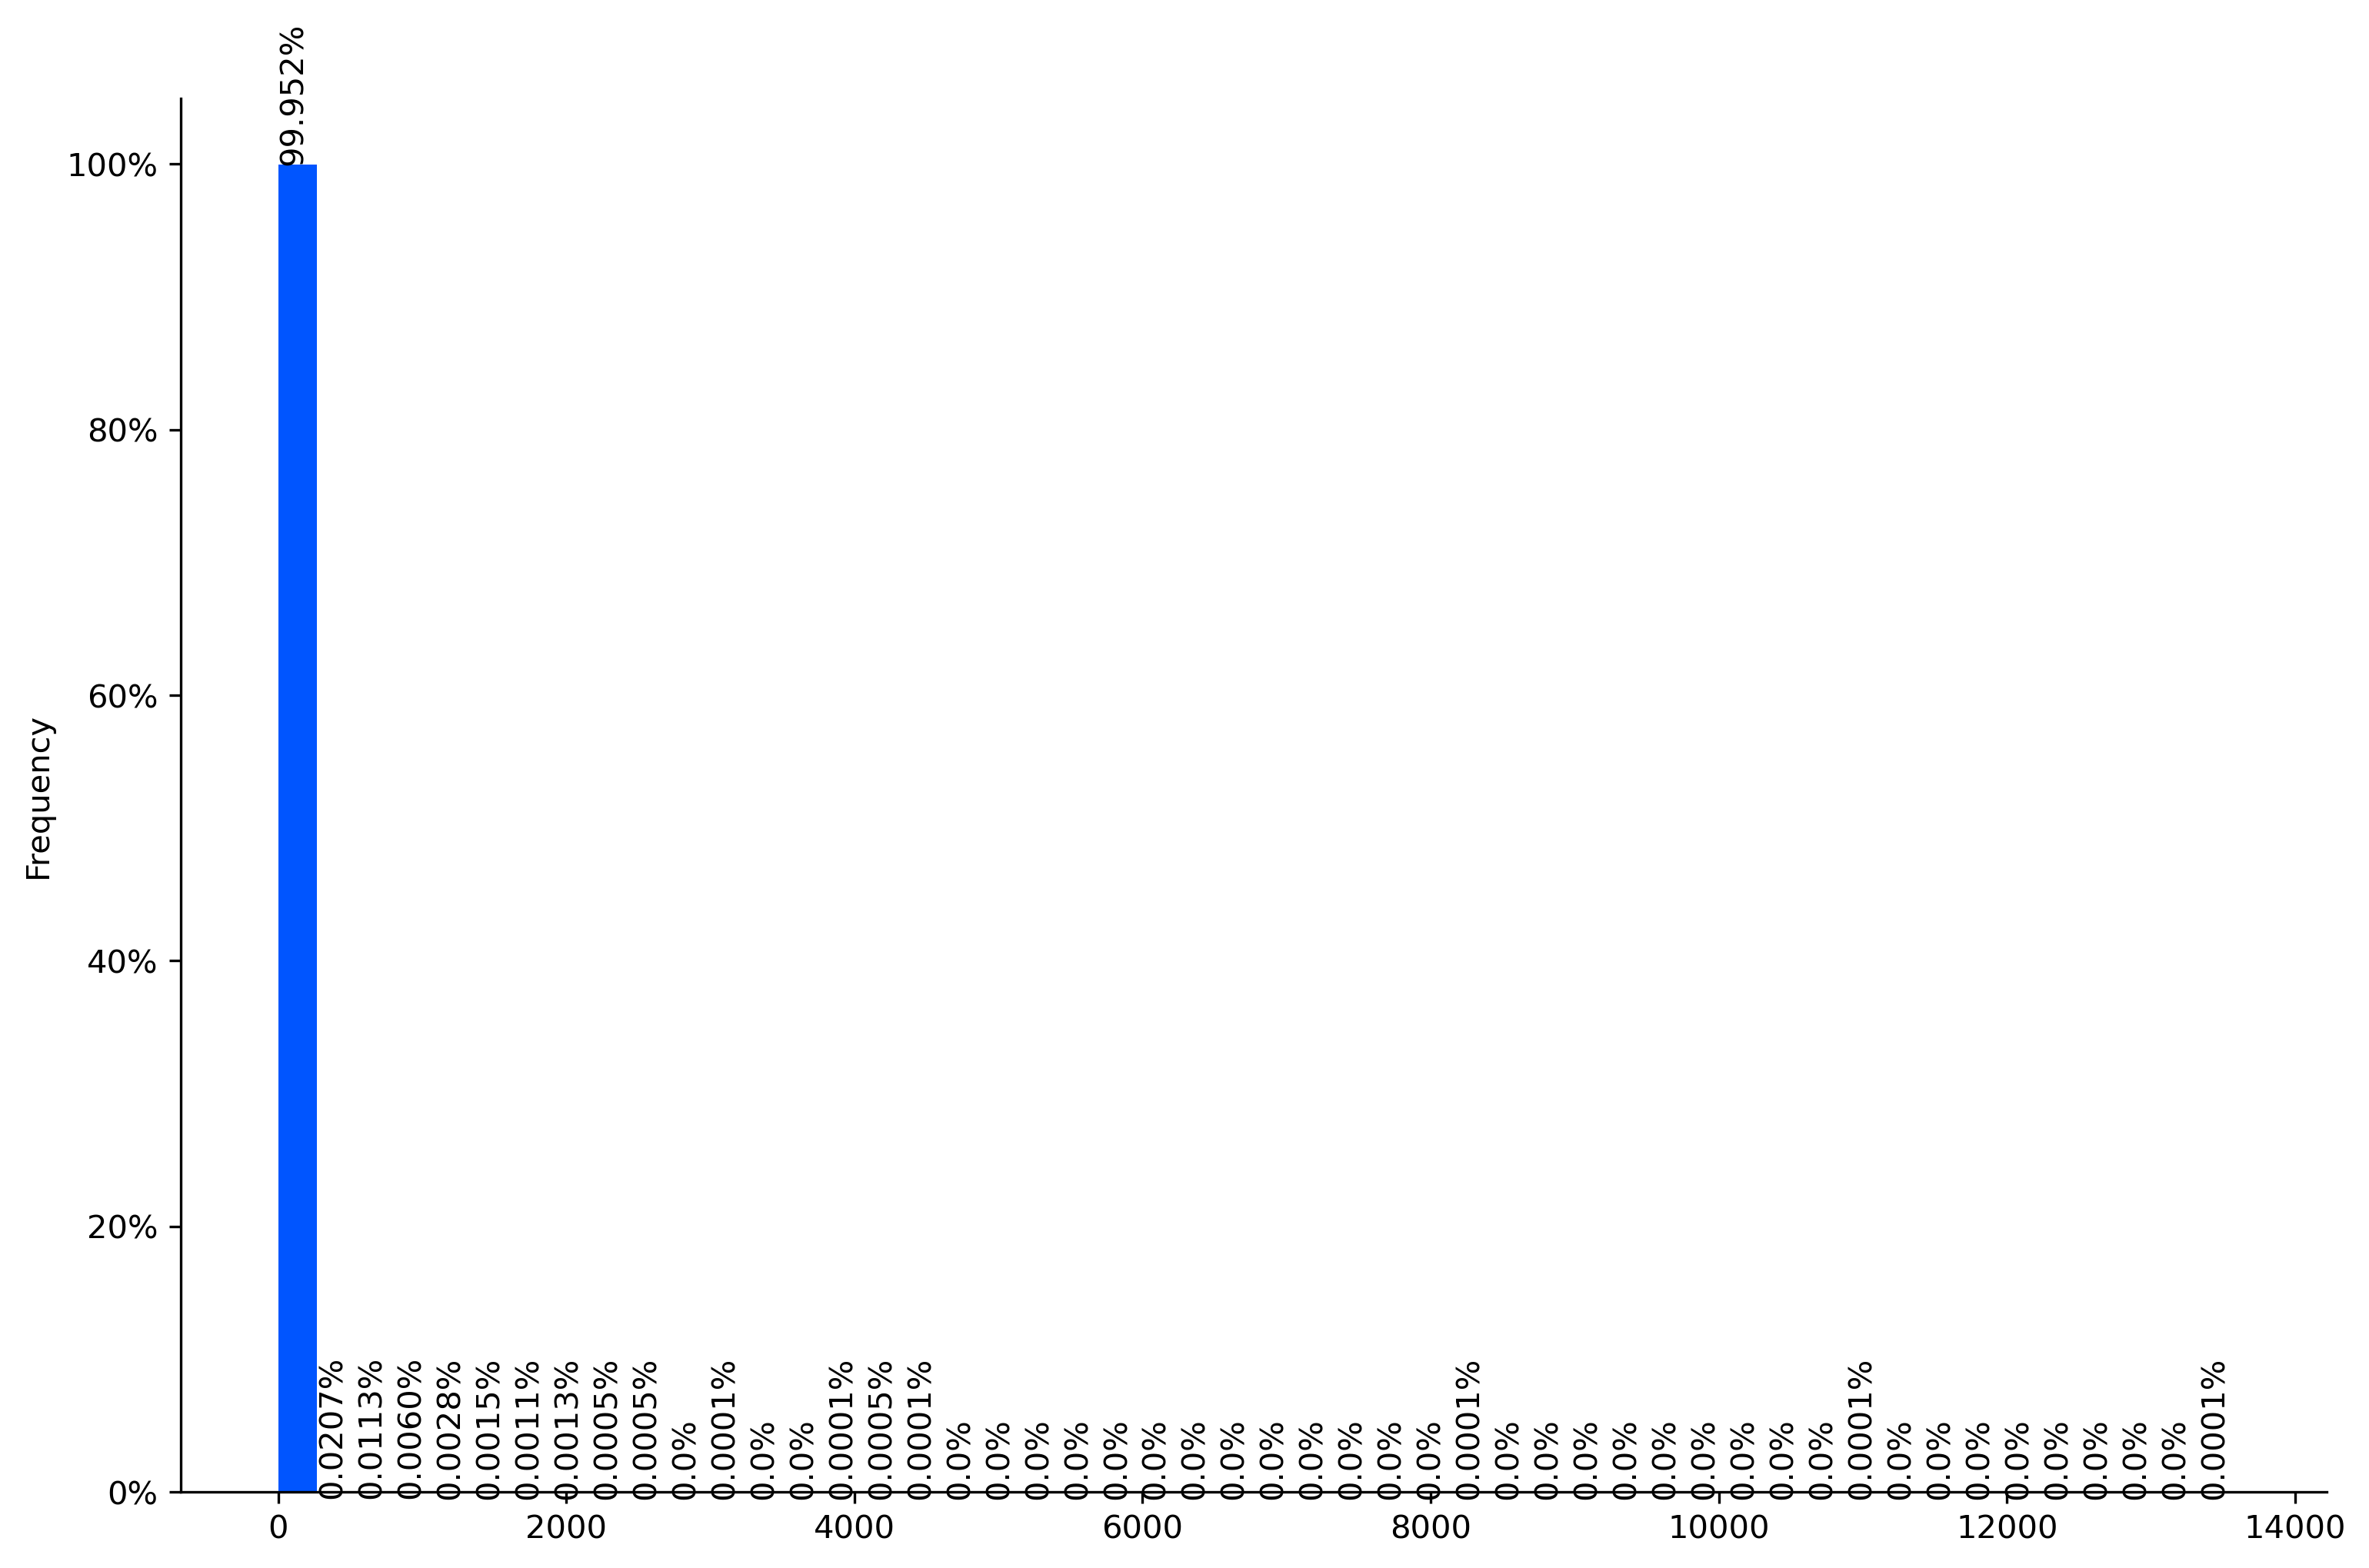

In [116]:
from matplotlib.ticker import PercentFormatter
#fig=plt.figure(dpi=300)
ax = df2['UnitPrice'].plot(kind='hist', bins=50, weights=np.ones(len(df2))/df2.shape[0], color='#0055FF')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
for p in ax.patches:
    ax.annotate(str(p.get_height()*100)[:6]+'%', (p.get_x()*1.005, p.get_height()*1.005), rotation=90, ha='left')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [117]:
df2['UnitPrice'].describe()

count    530691.000000
mean          3.903303
std          35.896047
min           0.000000
25%           1.250000
50%           2.080000
75%           4.130000
max       13541.330000
Name: UnitPrice, dtype: float64

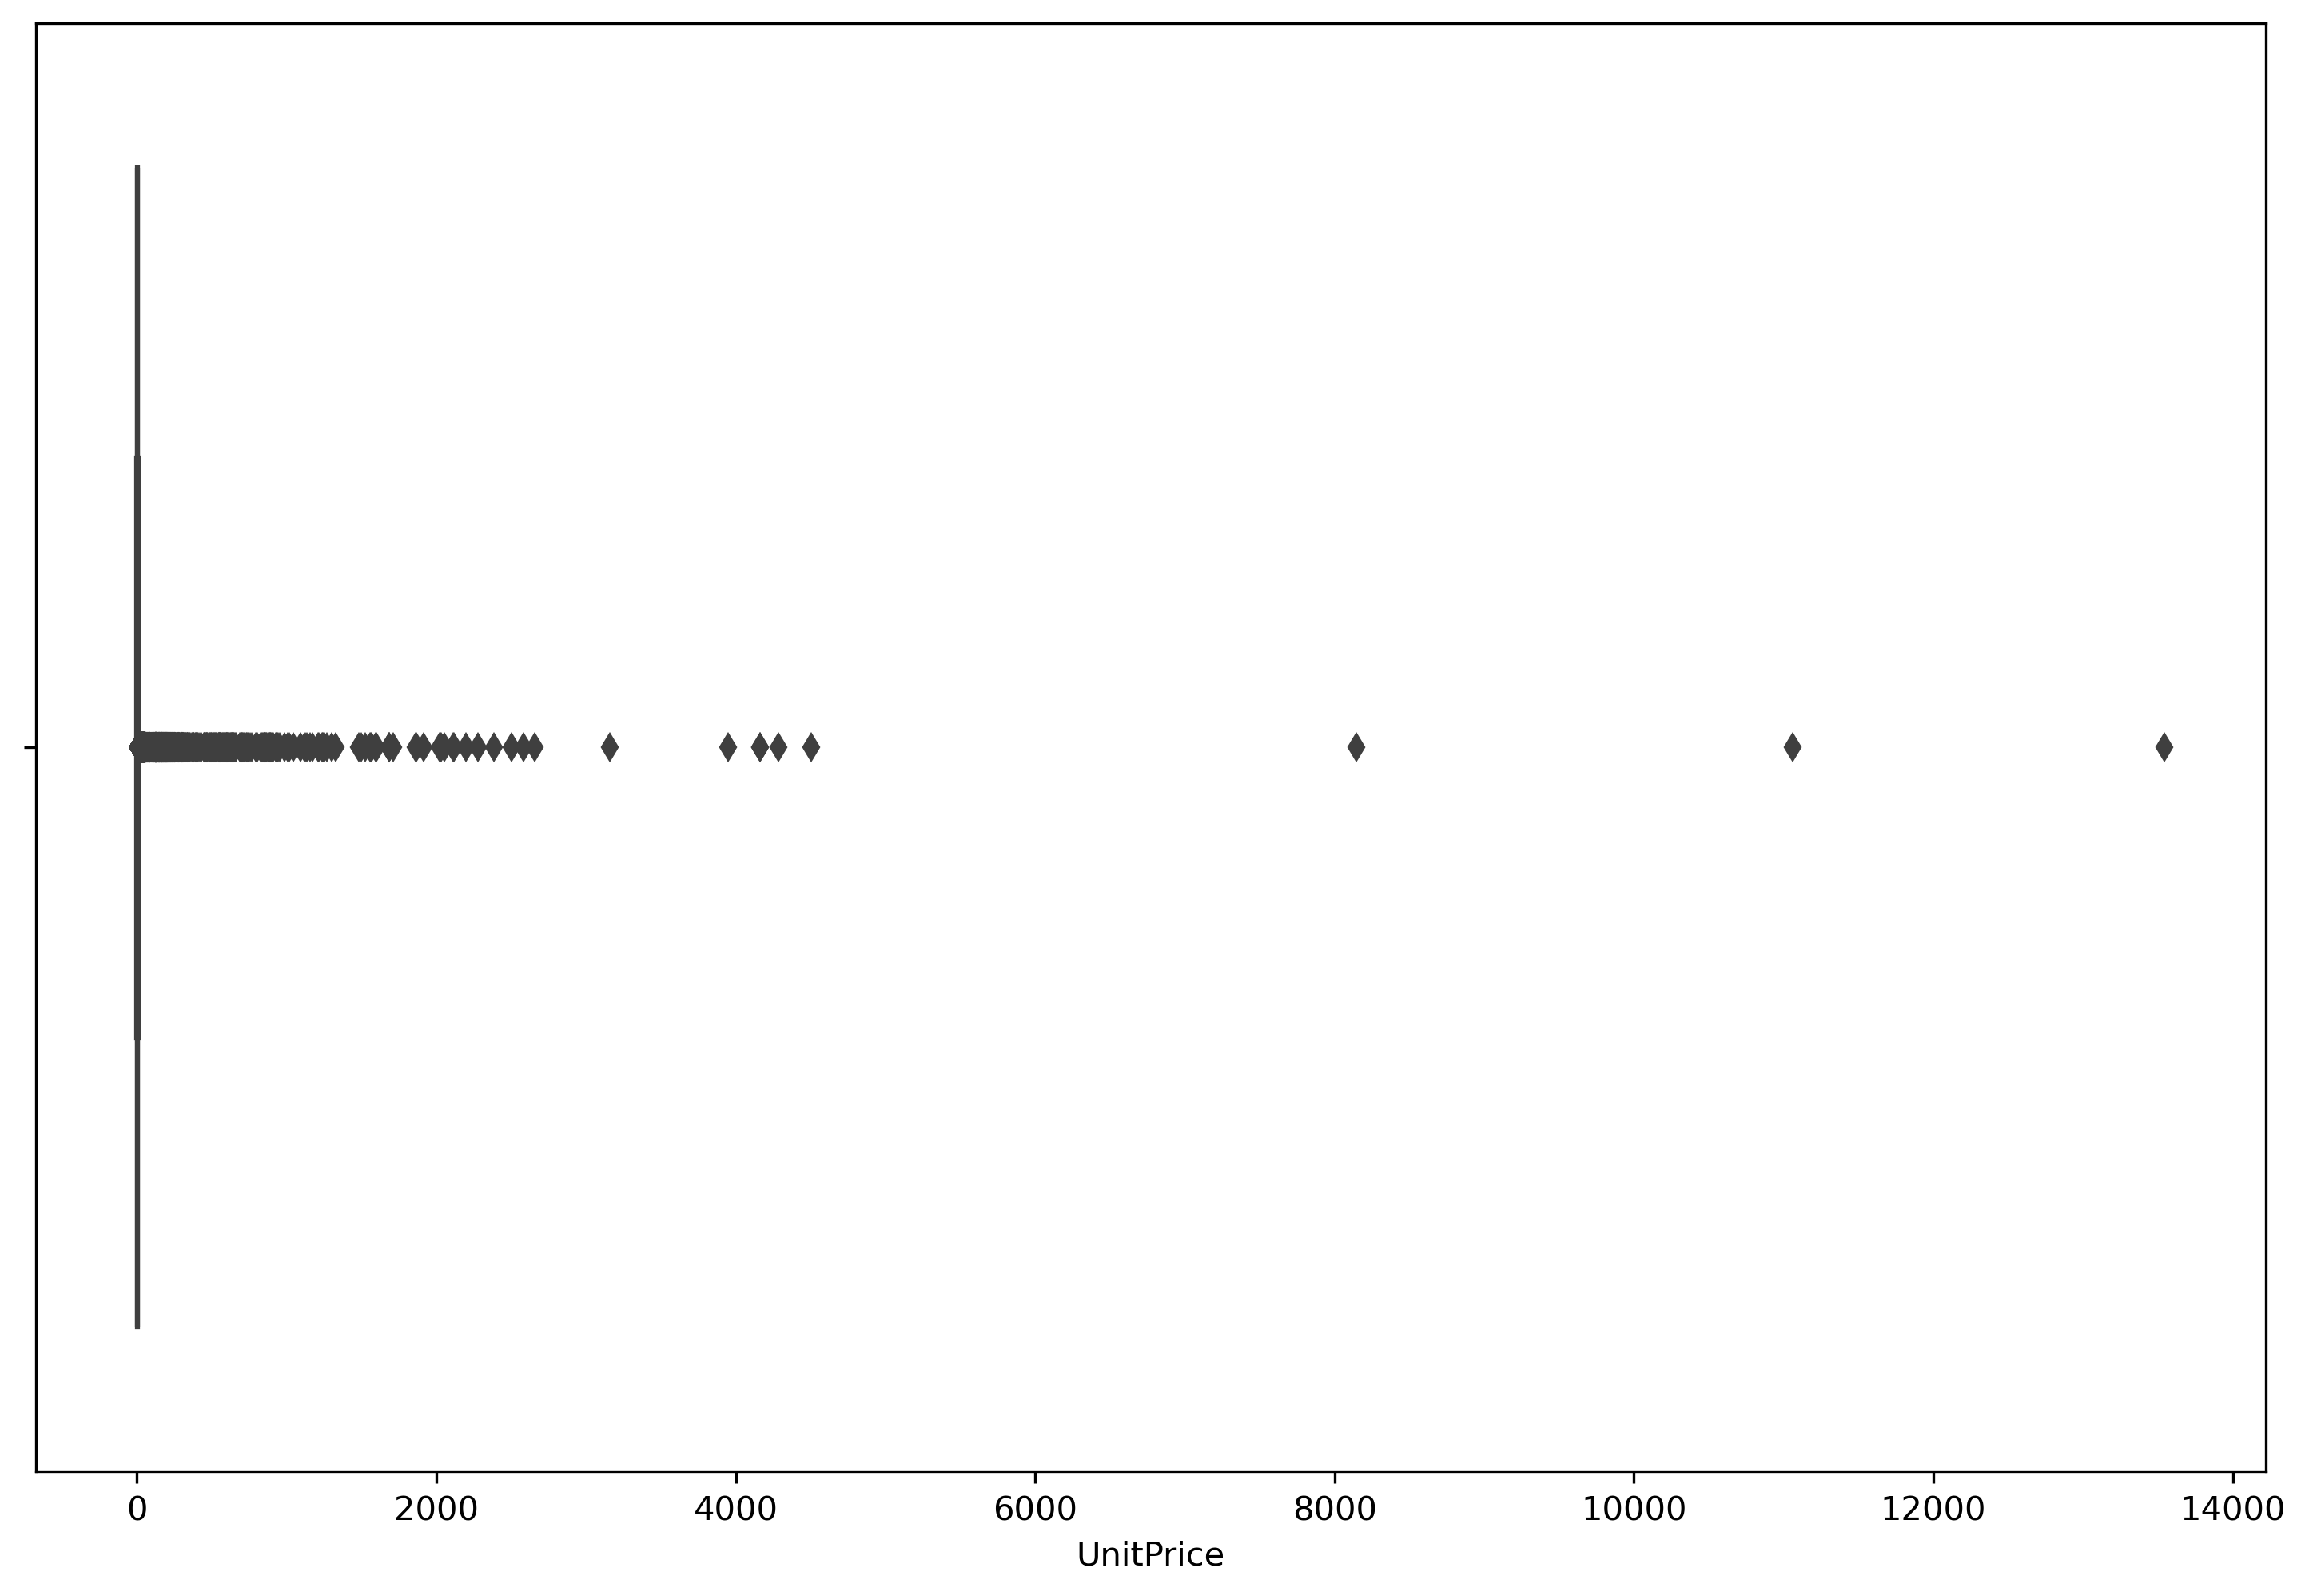

In [118]:
ax = sns.boxplot(df2['UnitPrice'])

No histograma, na tabela usando describe e no boxplot, fica muito claro que existem outliers nos dados. Por essa razão a visualização do histograma fica destorcida. Como 75% dos dados estão abaixo dos valores de 4.13 o histograma será feito apenas com os produtos que possuem preço unitário menor que 10.

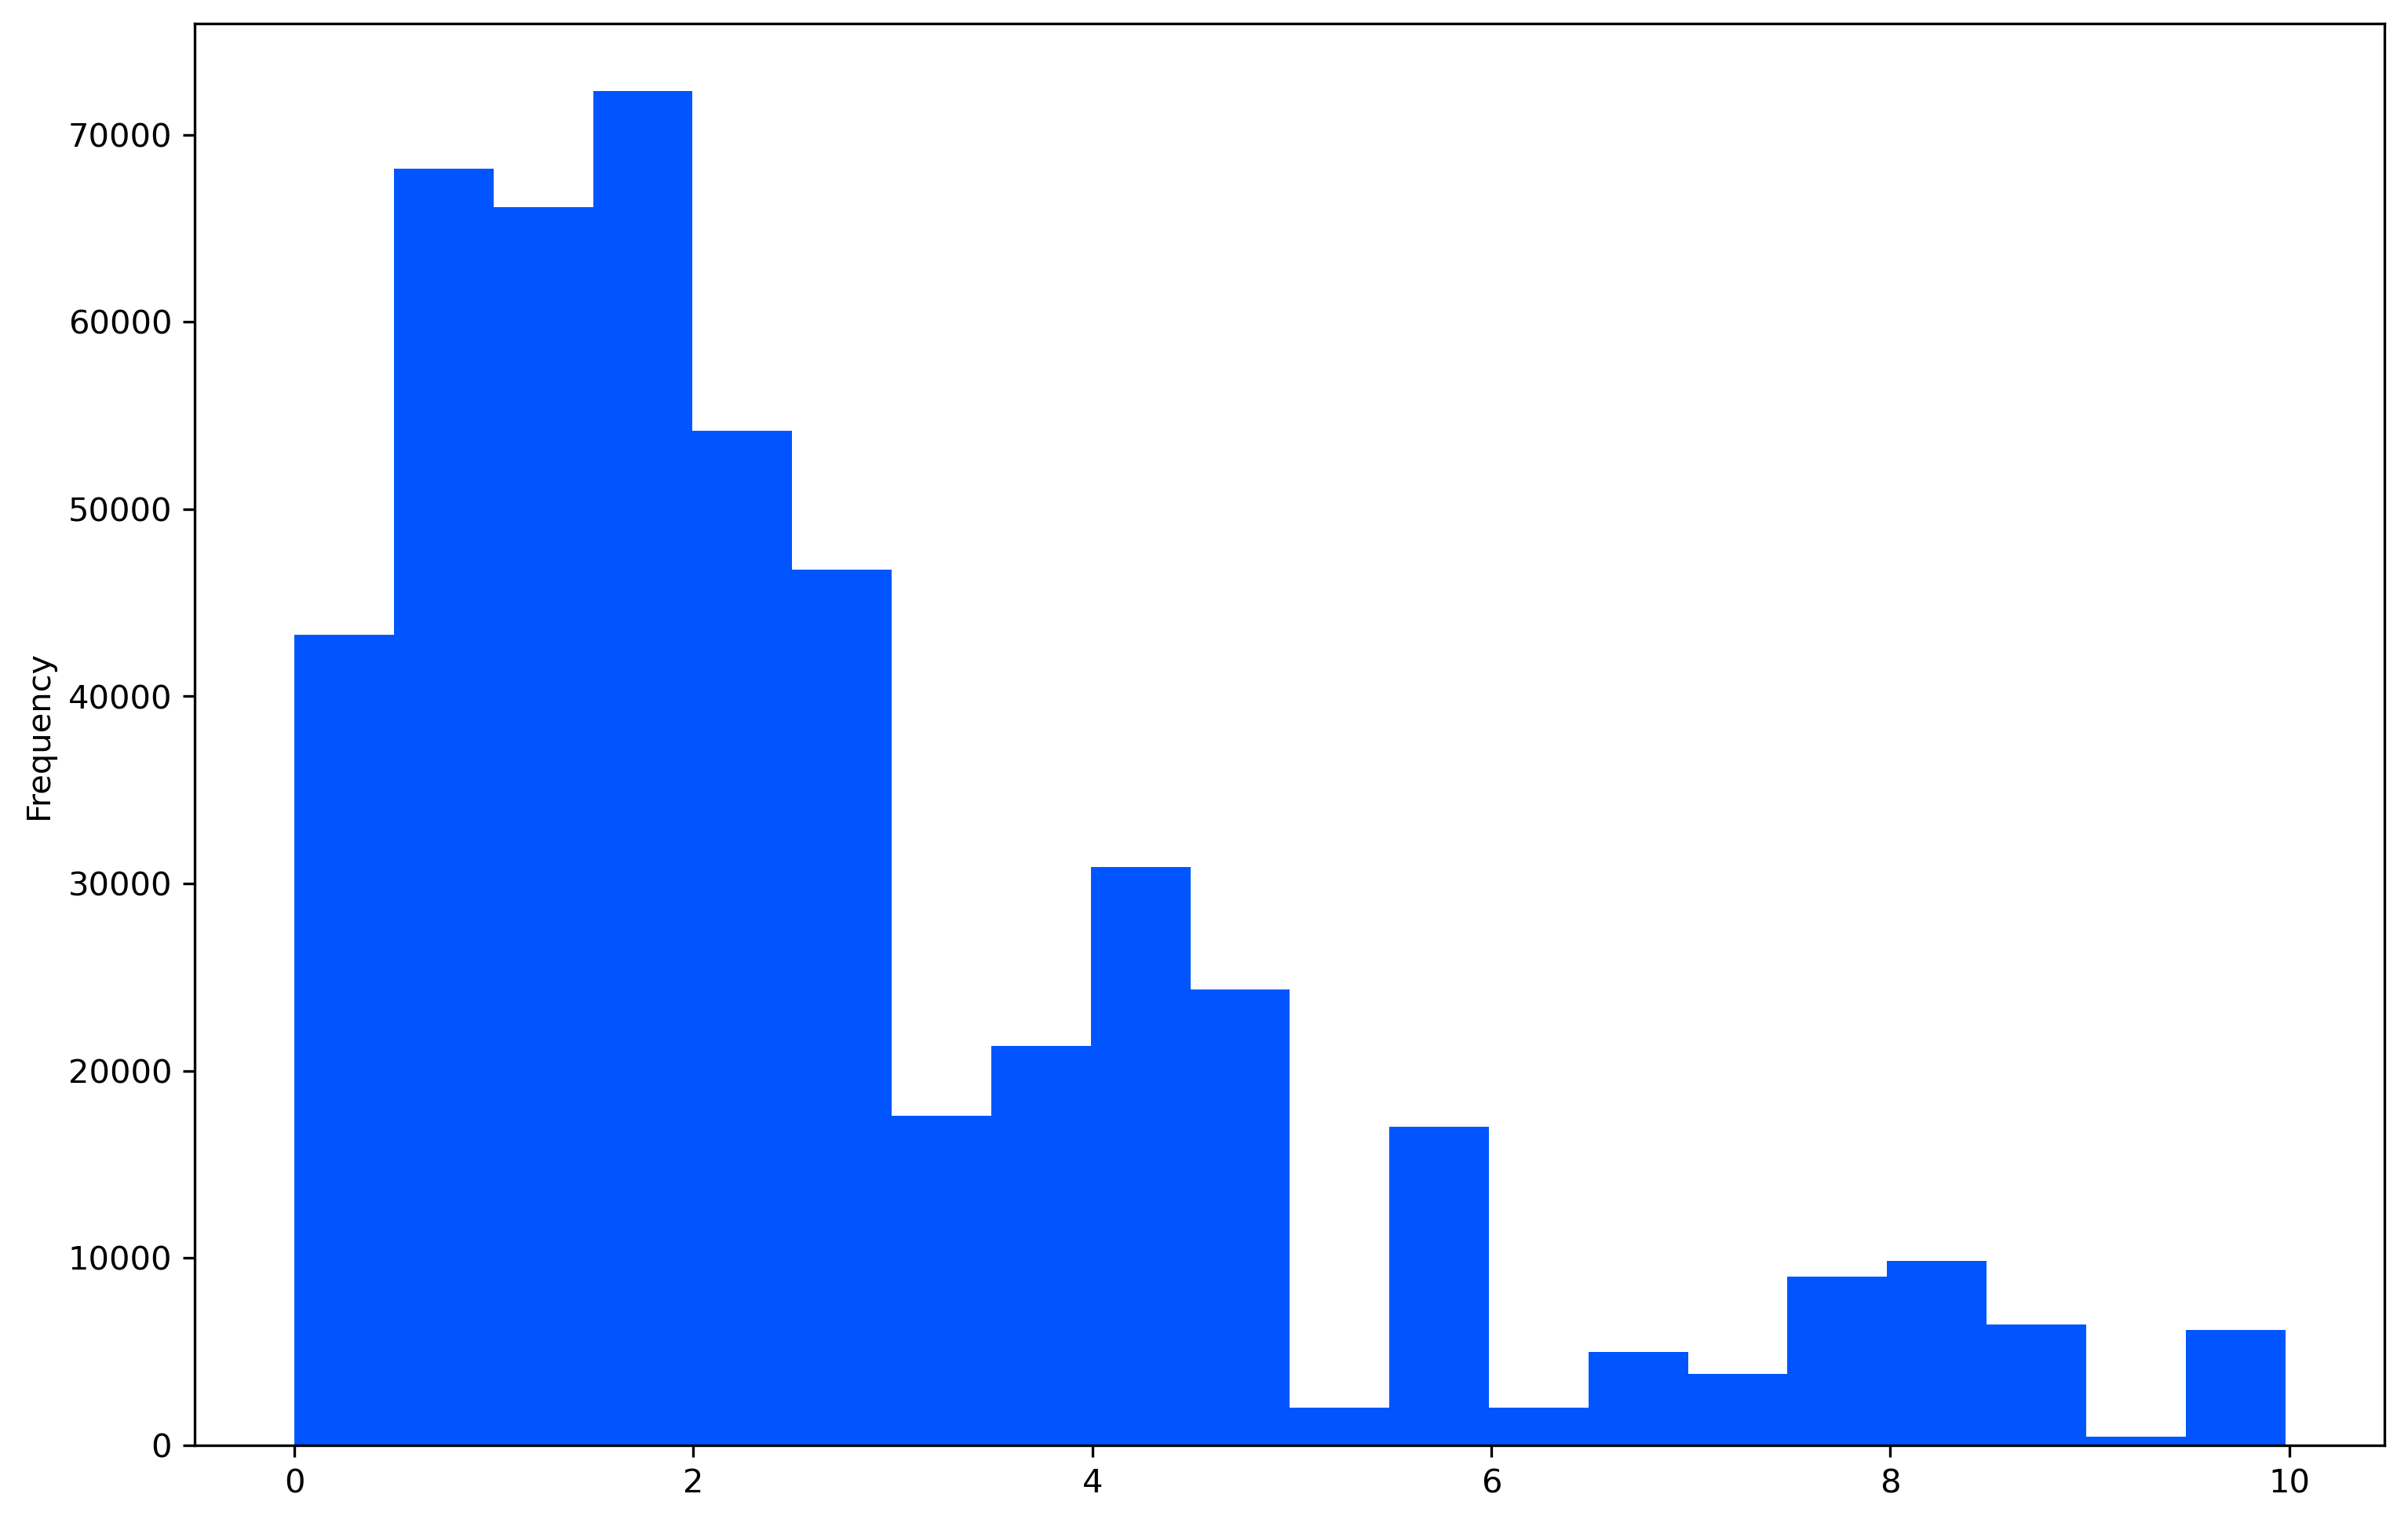

In [119]:
df2[df2['UnitPrice']<10]['UnitPrice'].plot(kind='hist', bins=20, color='#0055FF')

**Faça dois gráficos de barras da quantidade de compras e do total de faturamento por país.**

O primeiro gráfico apresenta o total de compras considerando todos os países. O Reino Unido por ter um valor muito superior distorce a visualização.

Text(0, 0.5, 'Quantity')

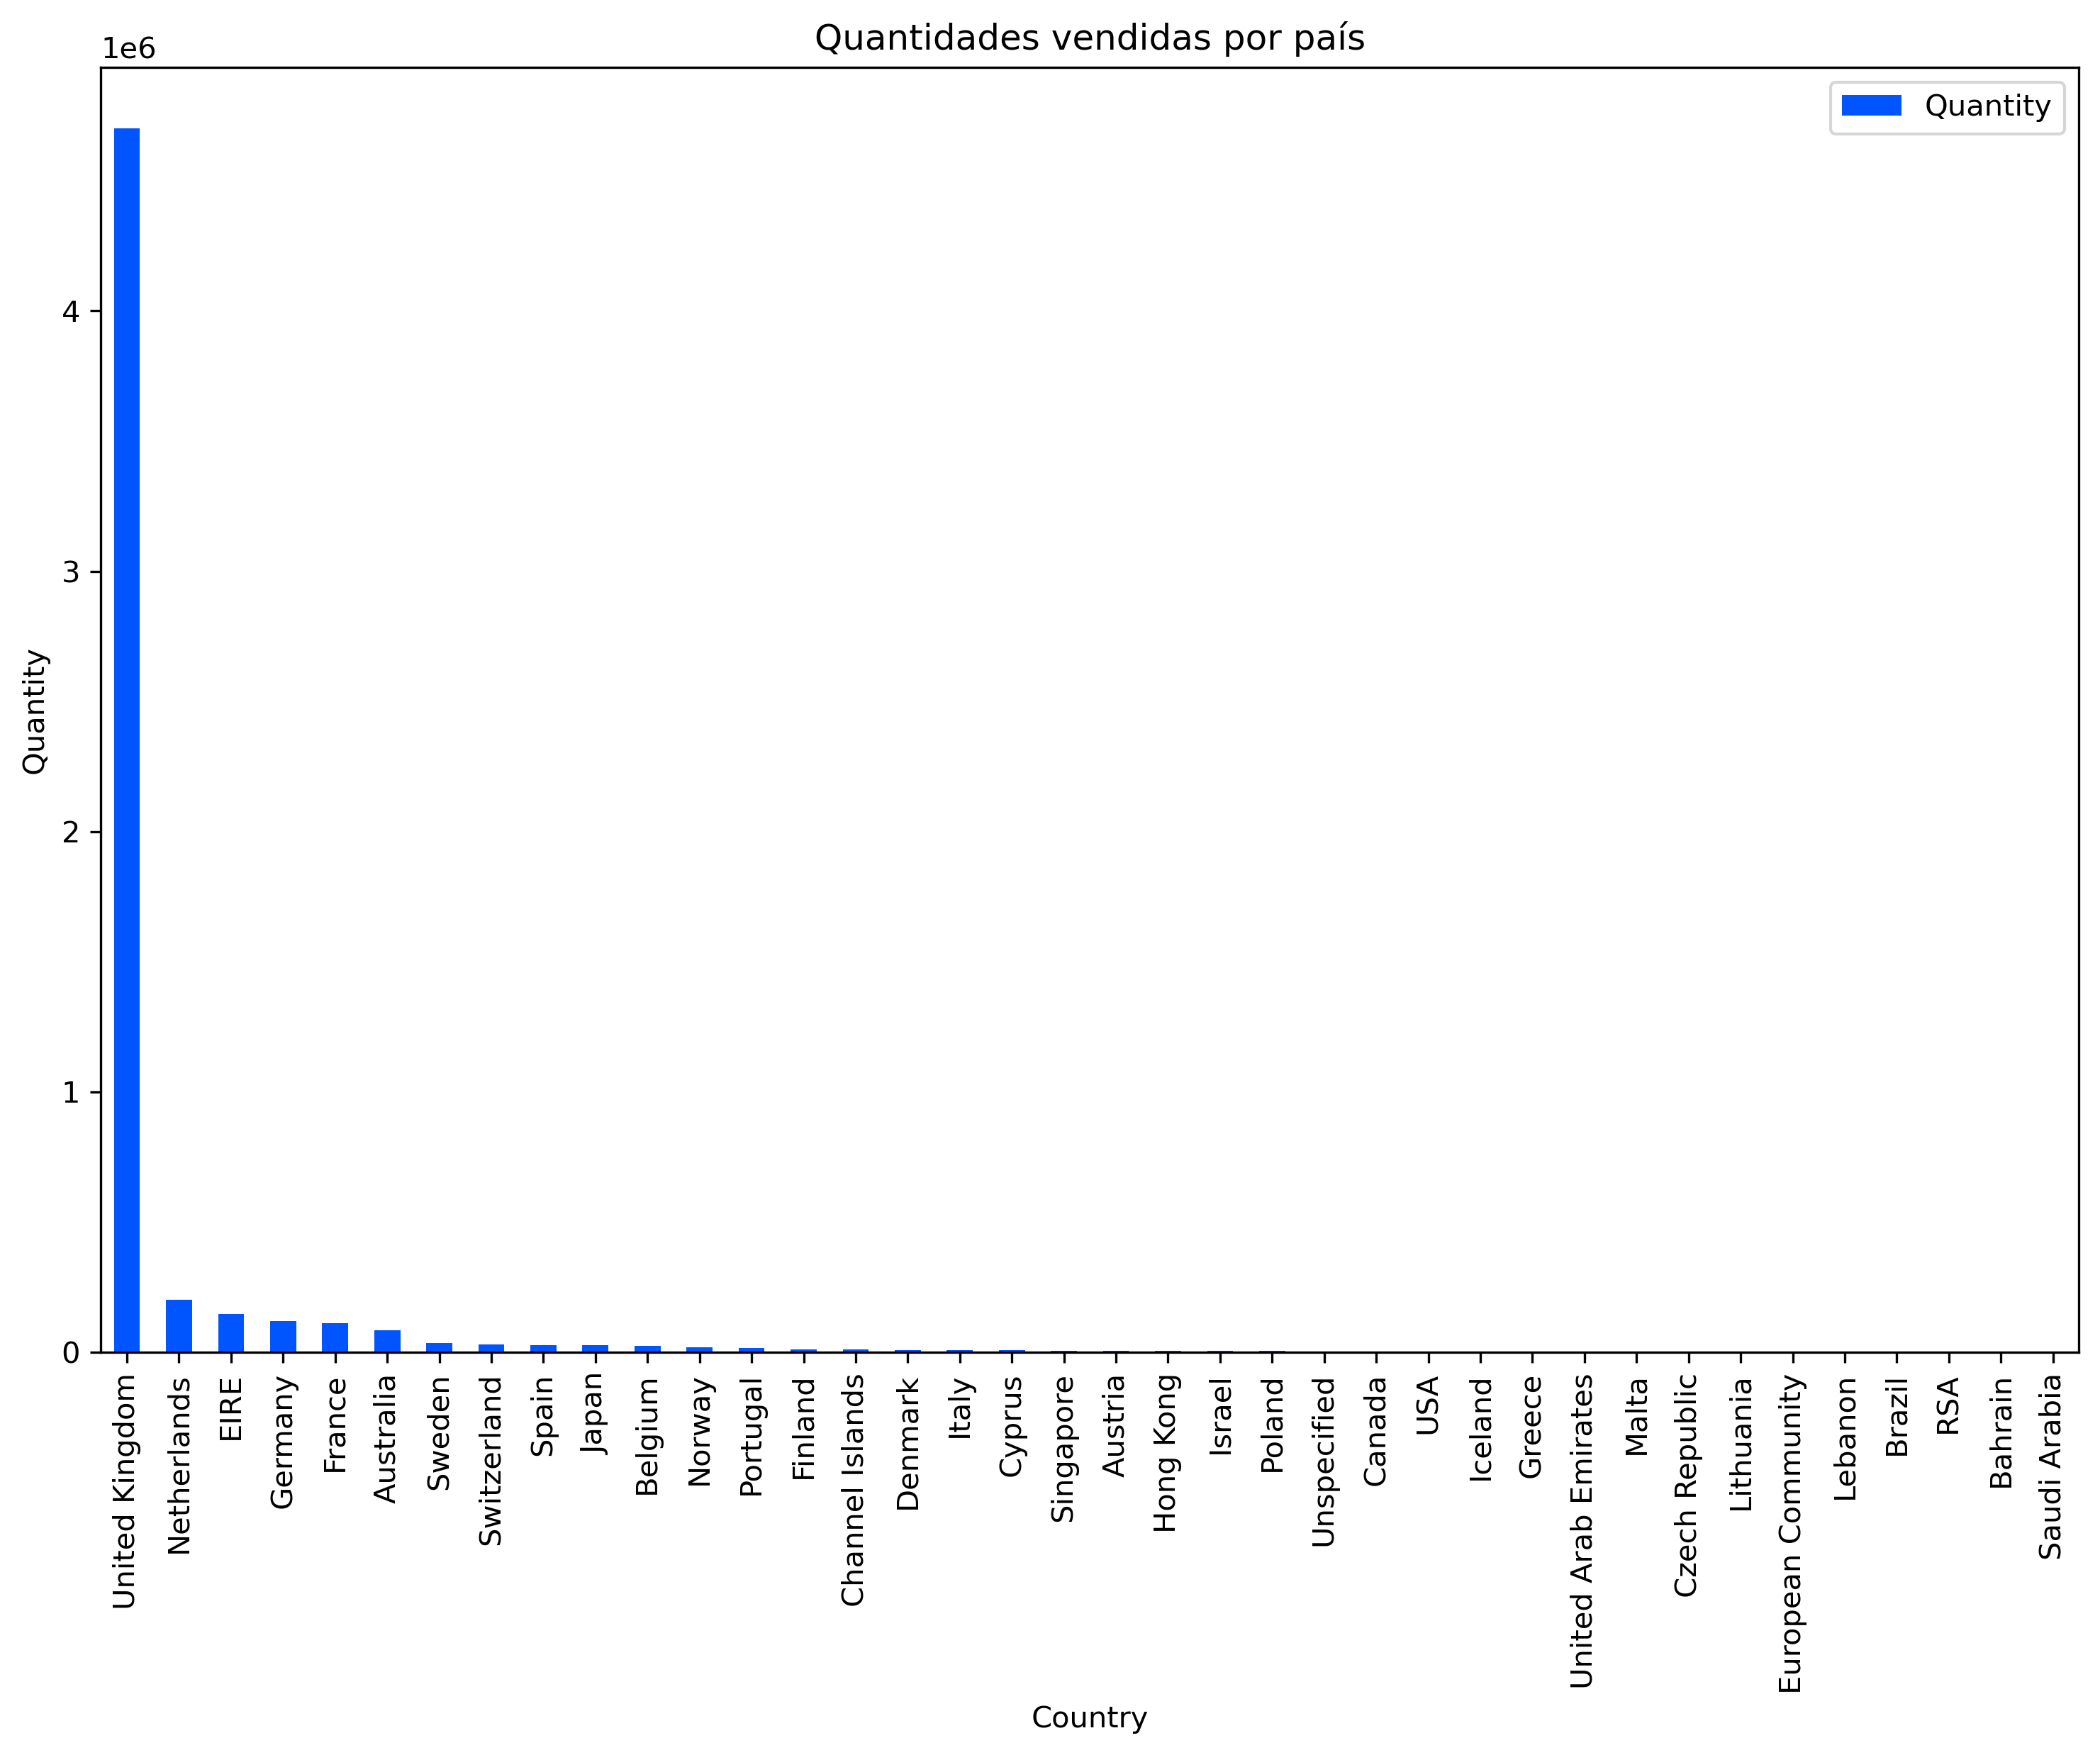

In [106]:
qtde_compras_por_Pais = df2[['Country','Quantity']].groupby('Country')\
    .sum().sort_values(by='Quantity', ascending=False)
qtde_compras_por_Pais[:].plot(kind='bar',color='#0055FF')
plt.title('Quantidades vendidas por país')
plt.ylabel('Quantity')

Para melhor visualização dos dados dos demais países nesse gráfico foi removido os dados referentes ao Reino Unido

Text(0, 0.5, 'Quantity')

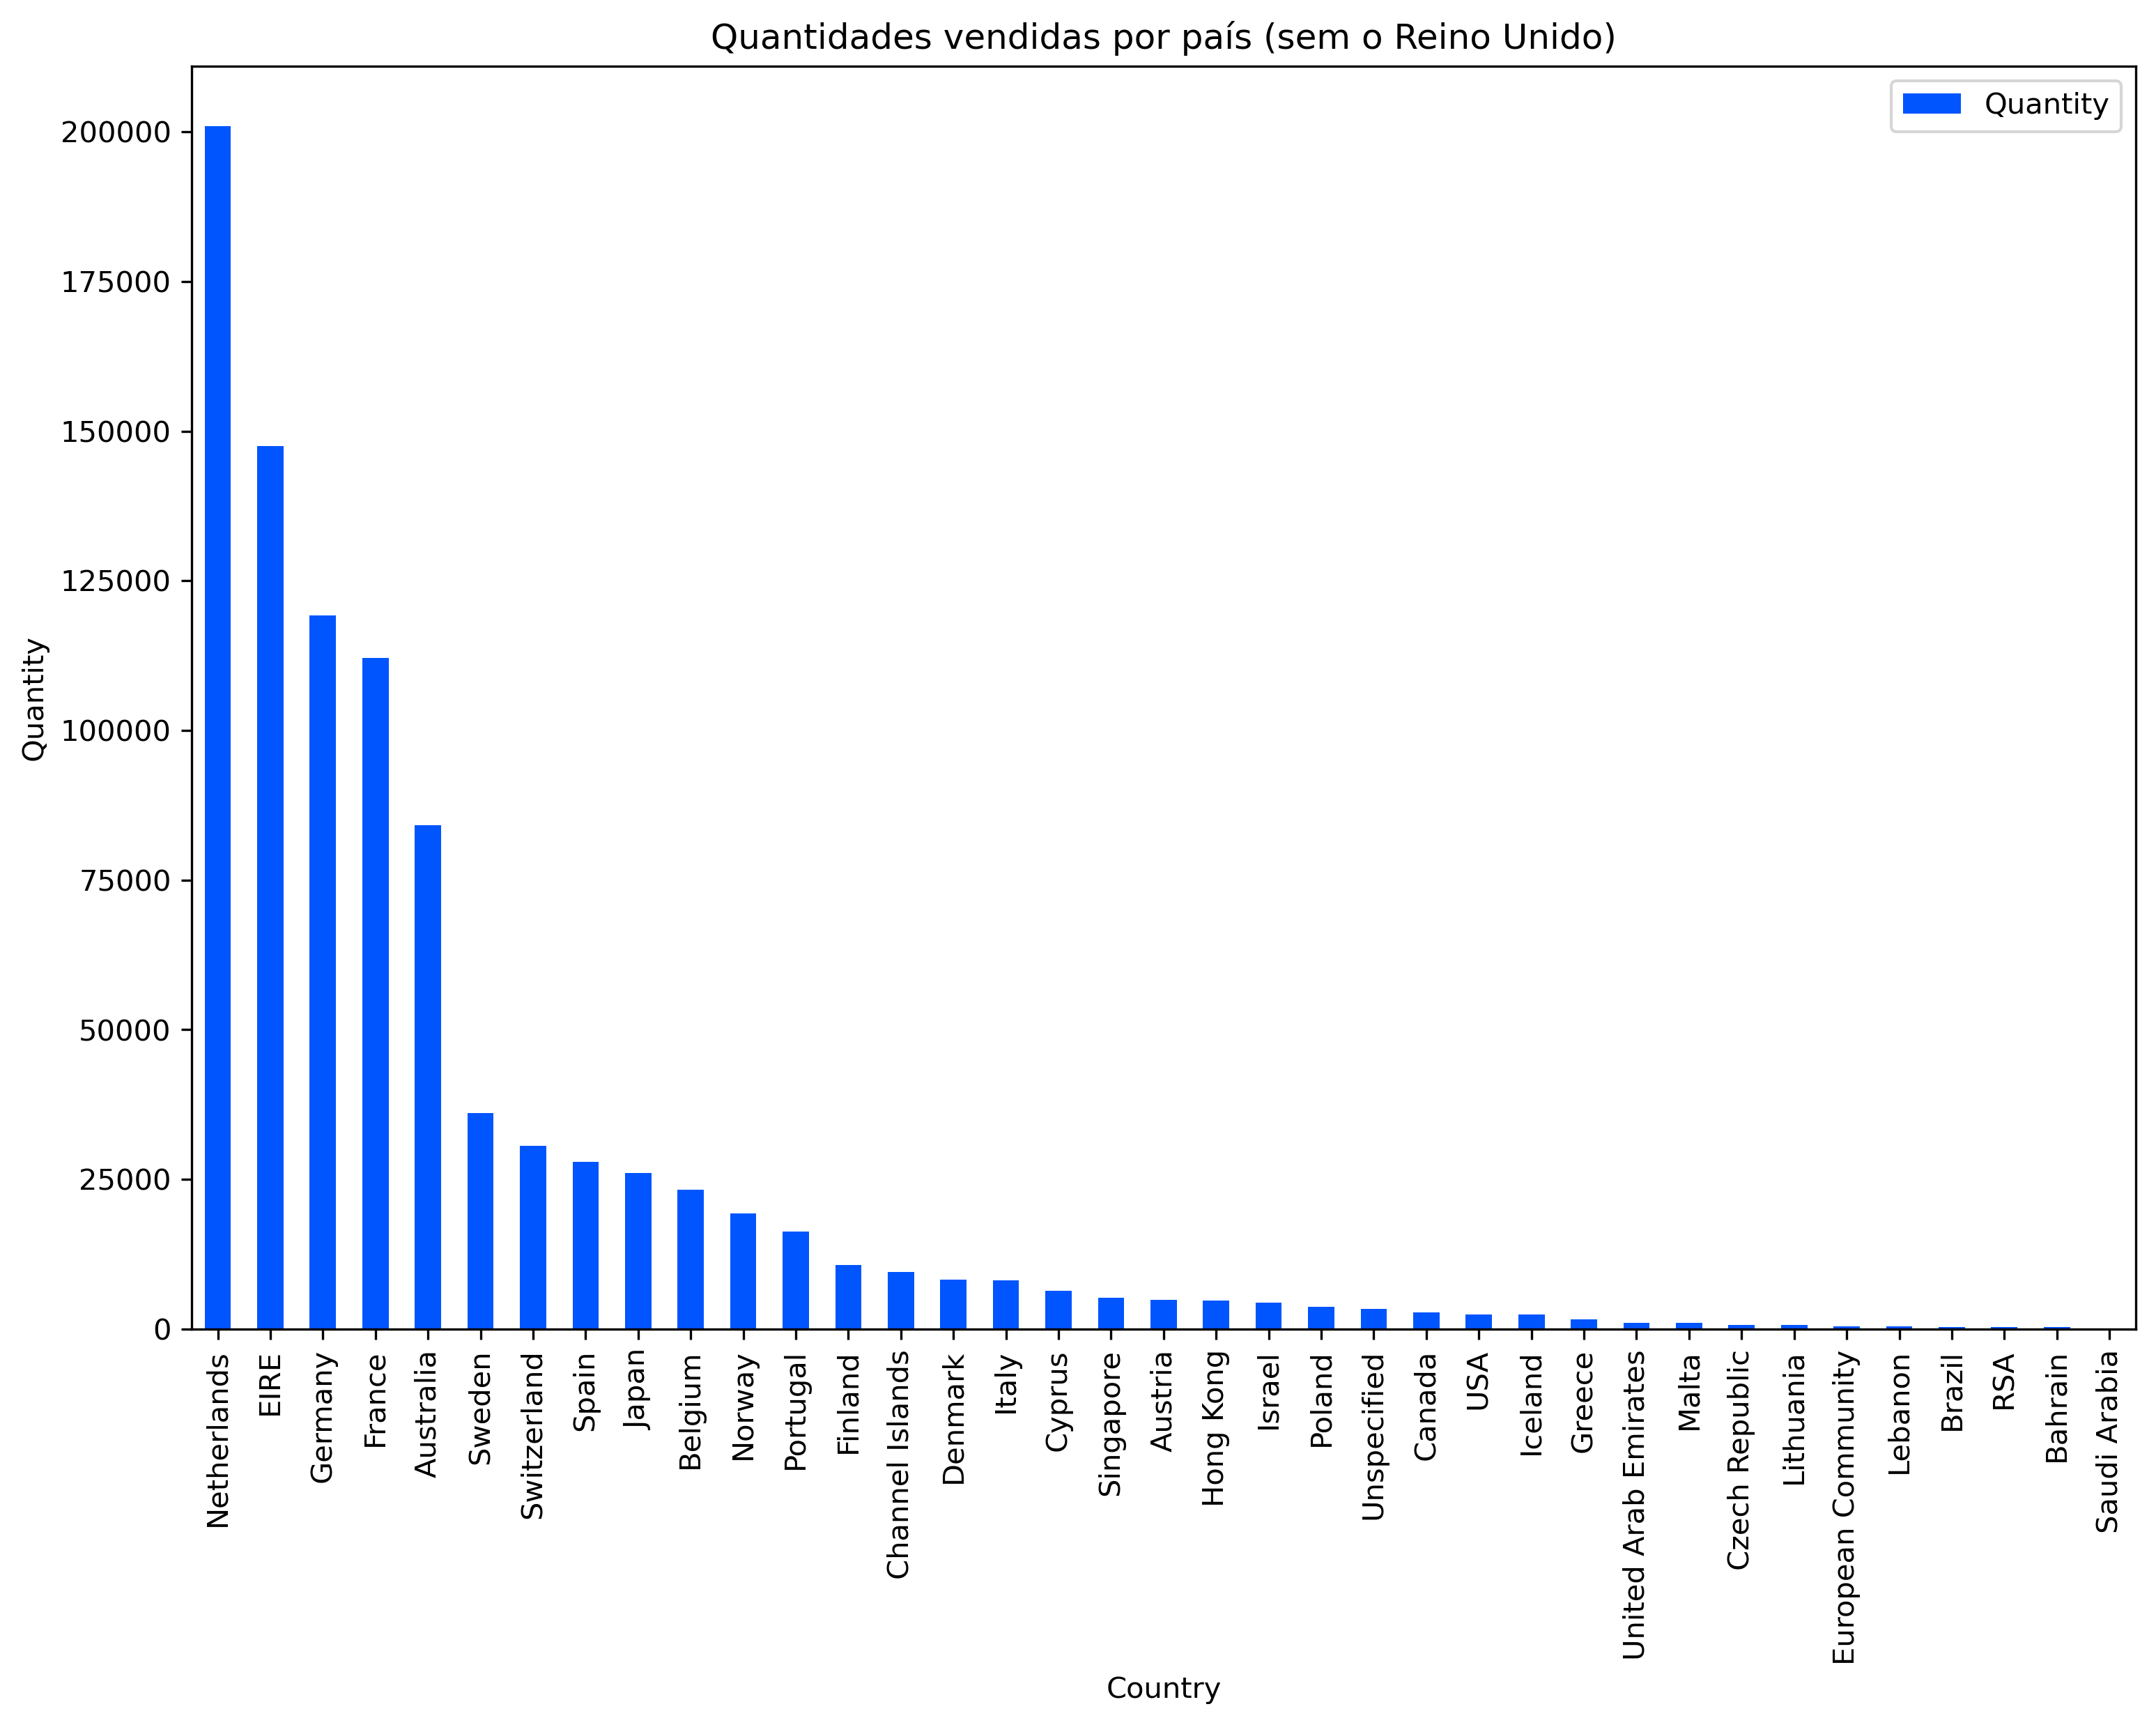

In [120]:
qtde_compras_por_Pais[1:].plot(kind='bar',color='#0055FF')
plt.title('Quantidades vendidas por país (sem o Reino Unido)')
plt.ylabel('Quantity')

In [310]:
qtde_compras_por_Pais

,Quantity
Country,
United Kingdom,4701270
Netherlands,200937
EIRE,147447
Germany,119263
France,112104
Australia,84209
Sweden,36083
Switzerland,30630
Spain,27951


As mesmas considerações quanto ao Reino Unido são feitas para os gráficos de faturamento por país

Text(0, 0.5, 'Faturamento')

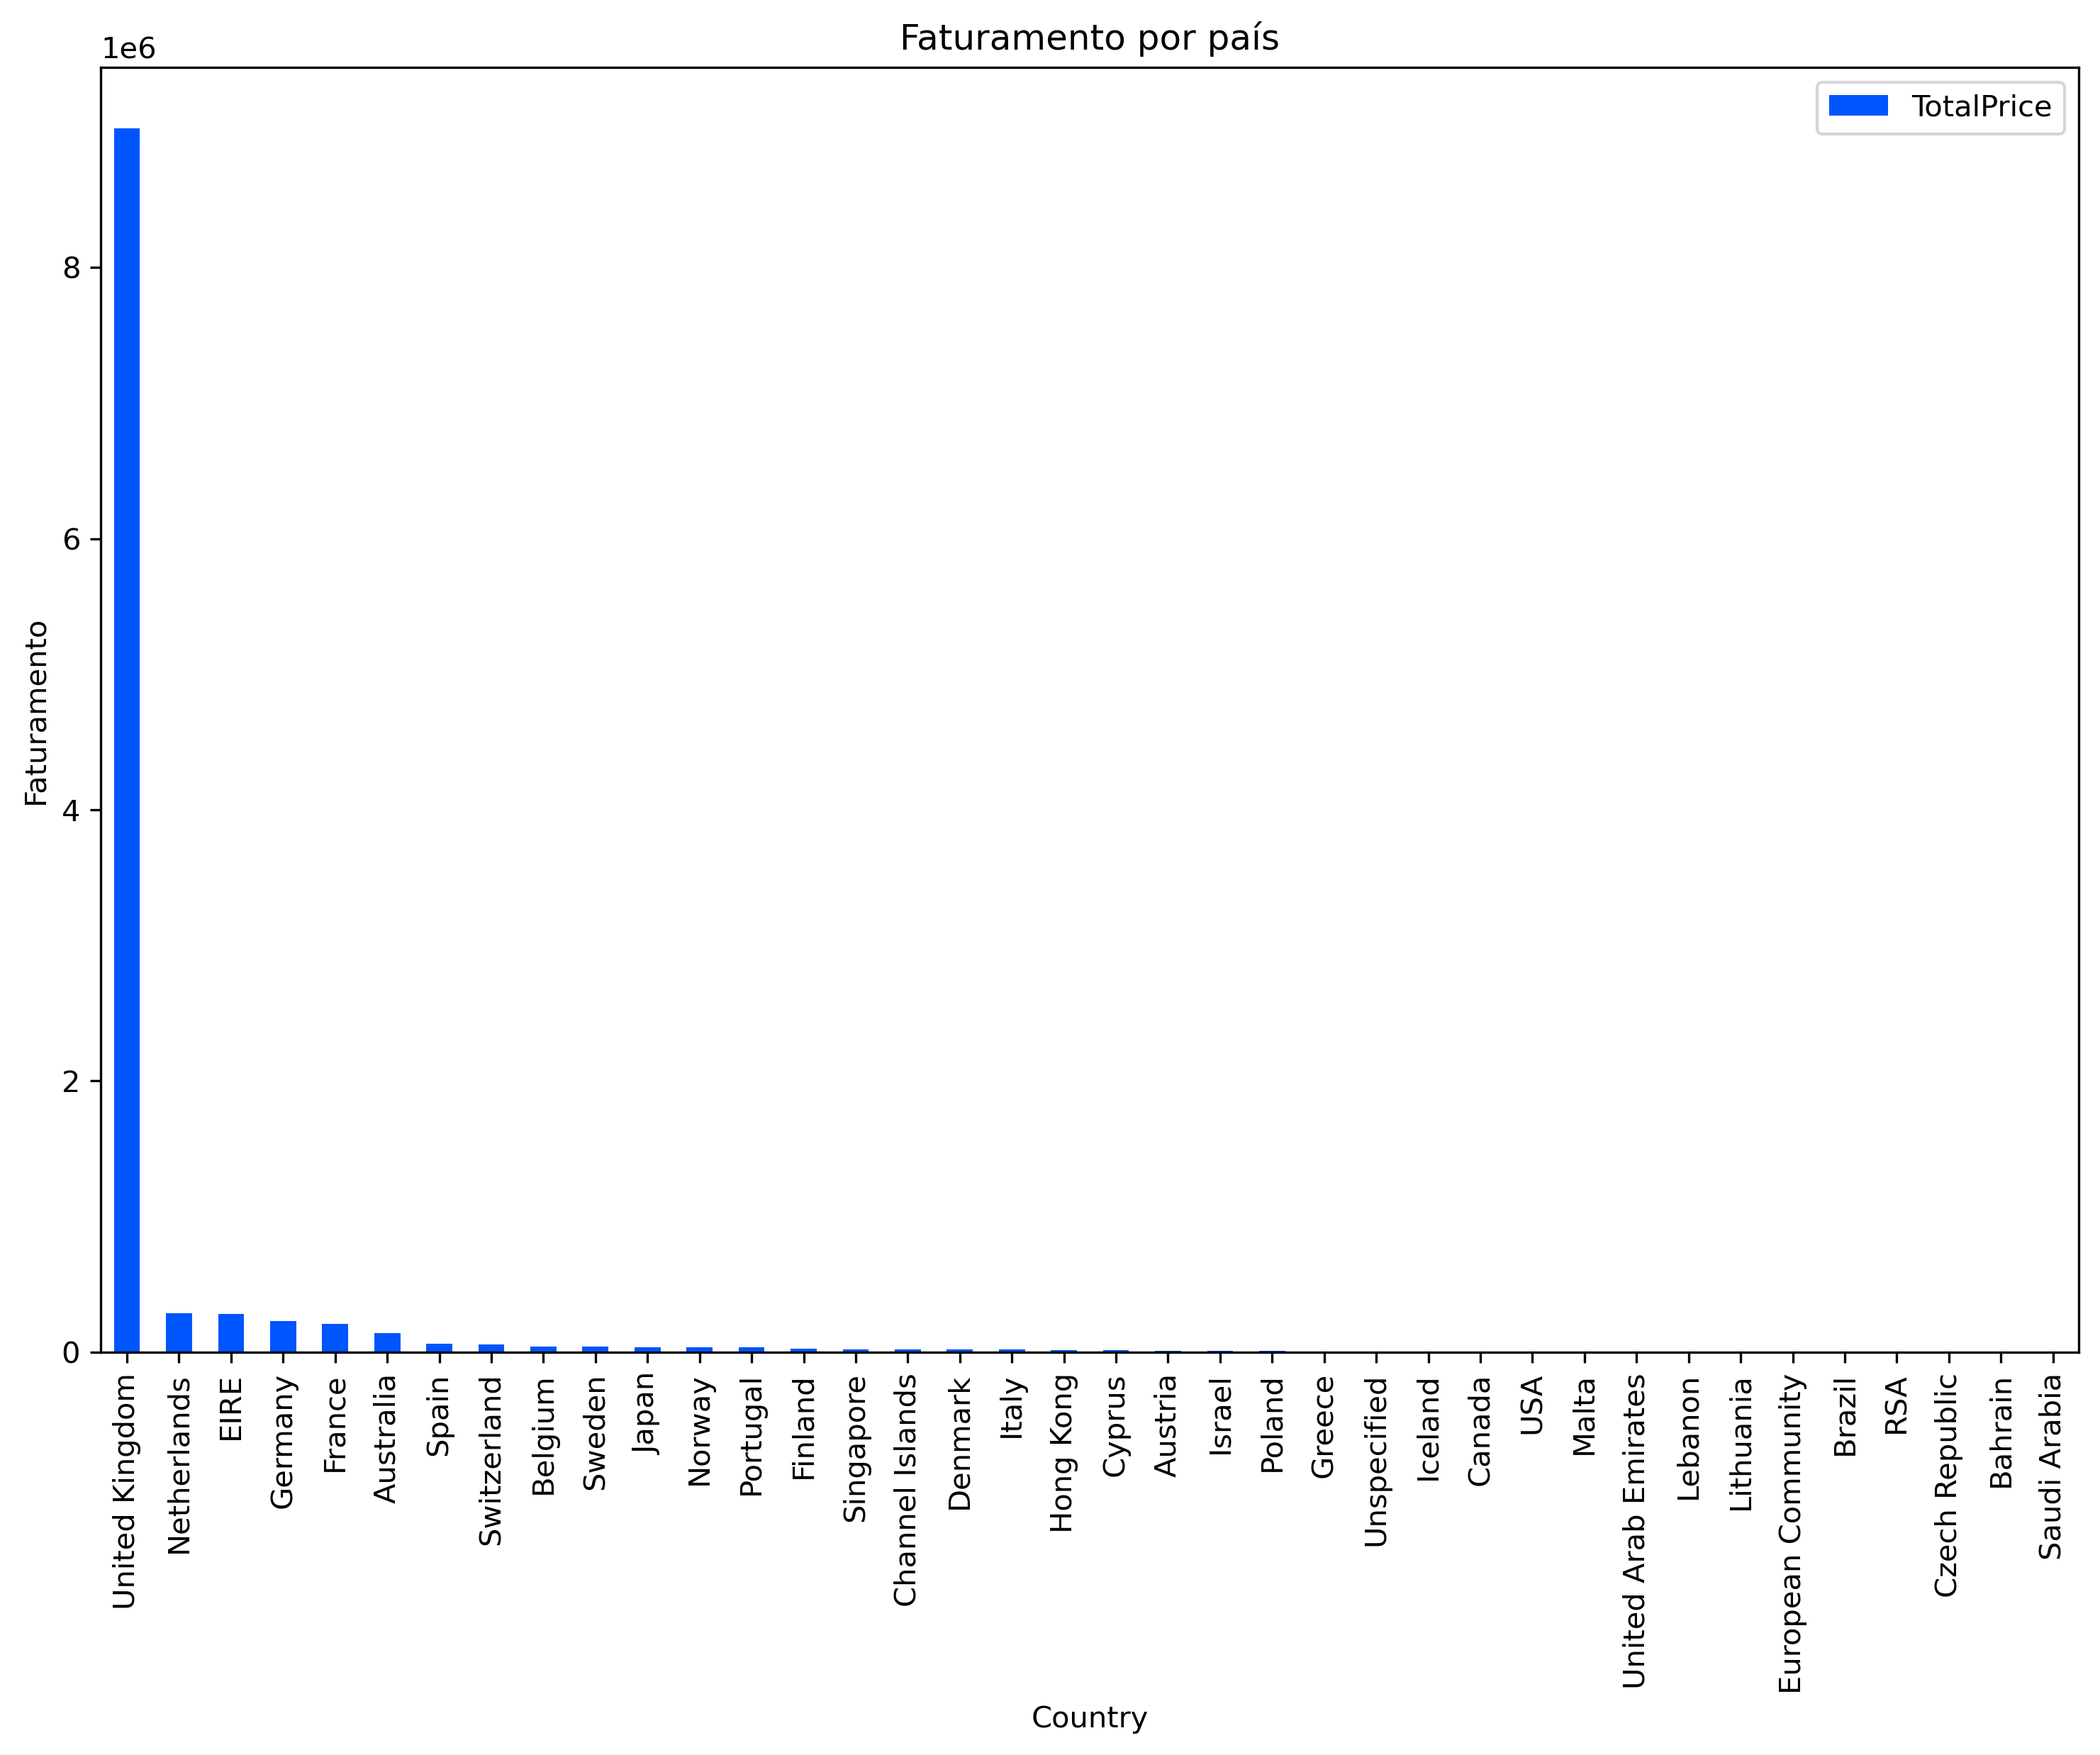

In [109]:
Faturamento_por_Pais = df2[['Country','TotalPrice']].groupby('Country')\
    .sum().sort_values(by='TotalPrice', ascending=False)
Faturamento_por_Pais[:].plot(kind='bar', color='#0055FF')
plt.title('Faturamento por país')
plt.ylabel('Faturamento')

De forma análoga, segue uma imagem sem considerar o Reino Unido para uma melhor visualização

Text(0, 0.5, 'Faturamento')

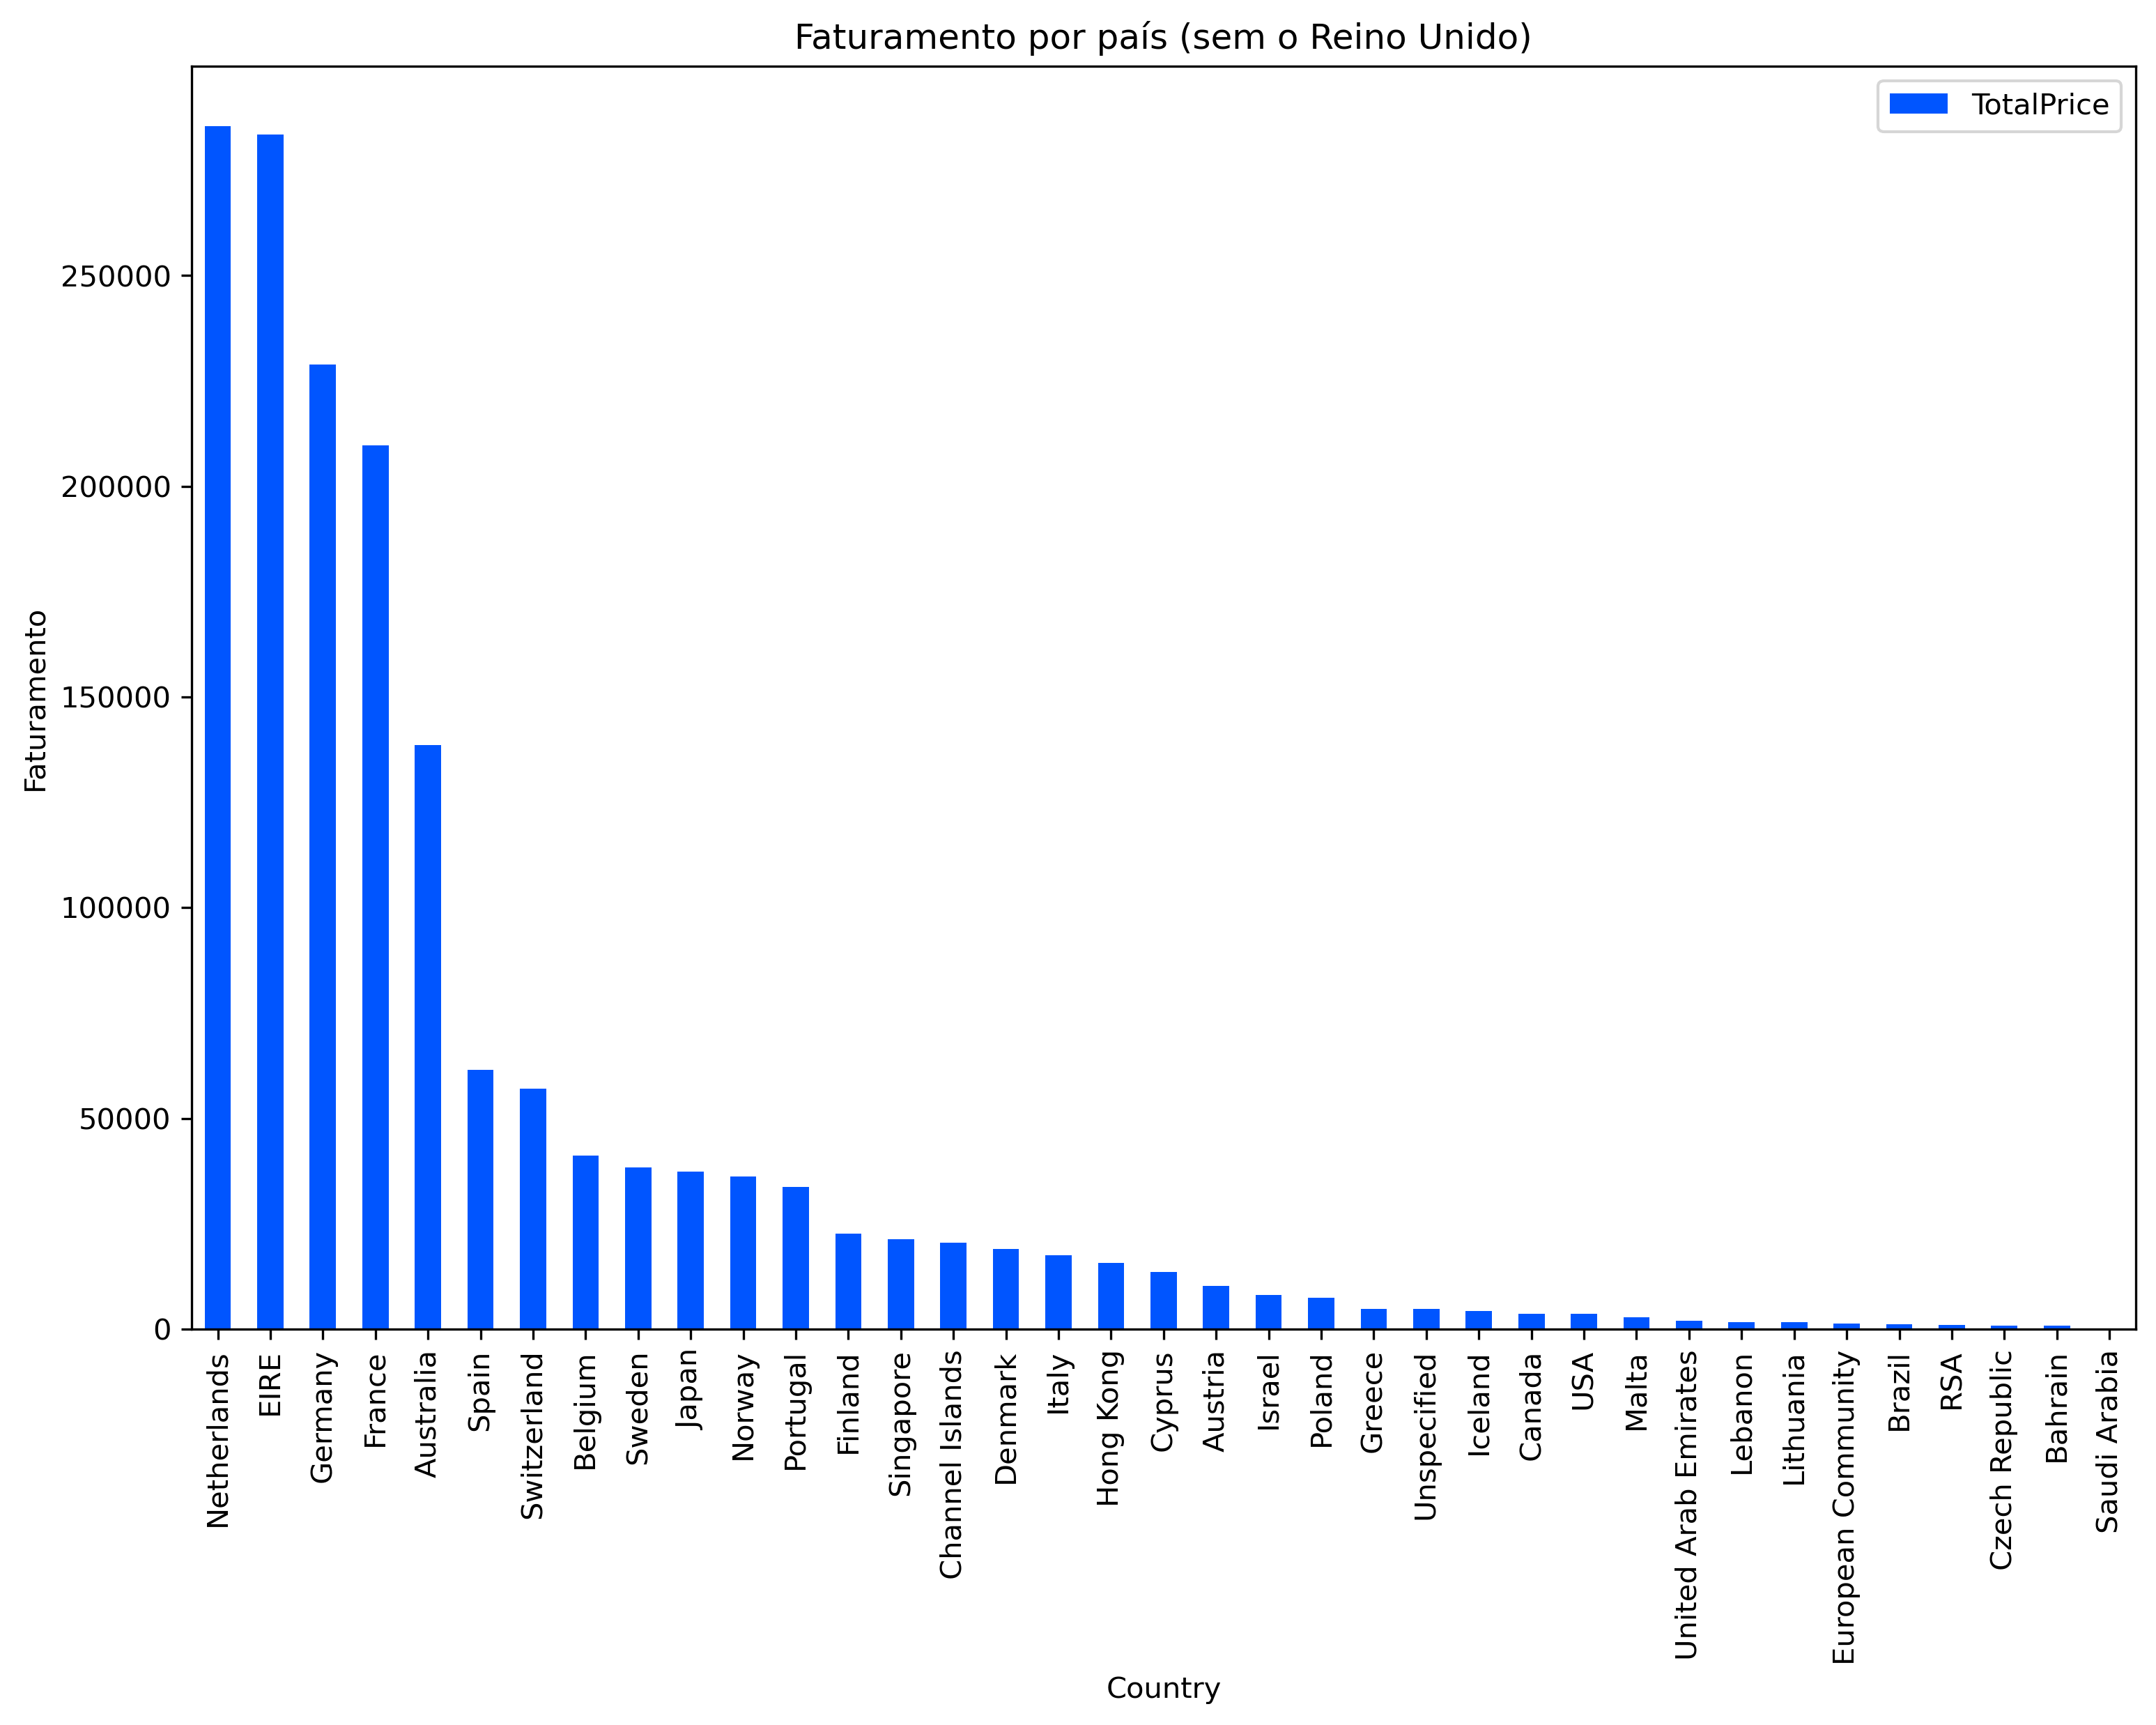

In [121]:
Faturamento_por_Pais[1:].plot(kind='bar', color='#0055FF')
plt.title('Faturamento por país (sem o Reino Unido)')
plt.ylabel('Faturamento')

In [122]:
Faturamento_por_Pais

,TotalPrice
Country,
United Kingdom,9.025222e+06
Netherlands,2.854463e+05
EIRE,2.834540e+05
Germany,2.288671e+05
France,2.097151e+05
Australia,1.385213e+05
Spain,6.157711e+04
Switzerland,5.708990e+04
Belgium,4.119634e+04
